In [1]:

########## This is some SAGEmath code used during the preparation of the paper
########## “A brute force computer aided proof of an existence result about extremal hyperbolic surfaces”
########## by Ernesto Girondo and Cristian Reyes

##### CELL 1: SOME FUNCTIONS

##### FUNCTION poli2pi3. Edges, vertices and midpoints of a regular polygon of n edges
def poli2pi3(n):
    u'''This is a function of an integer n. The output is a triplet consisting of the n edges, the n vertices 
    and the n edge midpoints of a regular hyperbolic polygon of angle 2Pi/3 centered at the origin. Points and vertices 
    are listed in counterclockwise order. The first midpoint, which lies in the negative imaginary axis, 
    corresponds to the last edge. 
    '''
    H=N(arccosh(1/(tan((pi)/n)*tan((pi)/3))))
    h=N(tanh(H/2))
    R=N(arccosh((cos((pi)/3))/(sin((pi/n)))))
    r=N(tanh(R/2))
    puntosmedios=[N(r*(cos(3*(pi)/2+2*k*pi/n))+I*r*(sin(3*(pi)/2+2*k*pi/n))) for k in [0..n-1]]
    vertices=[N(h*(cos(3*(pi)/2+(1+2*k)*pi/n))+h*(sin(3*(pi)/2+(1+2*k)*pi/n))*I) for k in [0..n]]
    lados = [PD.get_geodesic(vertices[k], vertices[k+1]) for k in [0..n-1]]
    return lados, vertices, puntosmedios
#####



##### FUNCTION   moverpol returns a plot of the image of the list of edges "lados", which is a global variable
def moverpol(x, col):
    u'''This is a function of a transformation x and a color col. The output is a plot in color col of the image of the 
    set "lados", which is a global variable.
    '''
    global lados
    bpol=Graphics()
    for j in [0..M-1]:
        movido=x*lados[j]
        bpol+=movido.show(color=col)
    return bpol
#####

##### FUNCTION   TresPuntos computes the line or circle determined by three points
def TresPuntos(a,b,c,coloro='no',ec='no'):
    u'''This function has three points a,b,c as input and computes the unique circle or straight line 
    passing through them. If an optional argument coloro (a colour) is given, the output is graphic.
    Instead of that, if an optional argument ec is given and different from 'no', the output is an algebraic equation. 
    '''
    x,y=var('x'), var('y')
    
    if bool(real(b)==real(a)) and bool(real(c)==real(a)):
        if bool(coloro=='no')==false and bool(ec=='no'):  # CASO 1
            return implicit_plot(x==real(a),(x,-1,1),(y,-1,1),color=coloro)
        elif bool(coloro=='no') and bool(ec=='no')==false :
            return x==real(a)

    elif bool(real(b)==real(a)) and bool(real(c)==real(a))==false and bool(imag(c)==imag(a))==false:
        cent=solve([y-(imag(c)+imag(b))/2==-1*(real(c)-real(b))/(imag(c)-imag(b))*(x-(real(c)+real(b))/2), y==(imag(a)+imag(b))/2],x,y)
        if bool((real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2<10^3):
            if bool(coloro=='no')==false and bool(ec=='no'):  # CASO 2
                return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:  
                return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
        else: 
            if bool(coloro=='no')==false and bool(ec=='no'):
                return implicit_plot(y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b)),(x,-1,1),(y,-1,1),color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b))

    elif bool(real(b)==real(a)) and bool(real(c)==real(a))==false and bool(imag(c)==imag(a)):
        cent=solve([y==(imag(a)+imag(b))/2, x==(real(a)+real(c))/2],x,y)
        if bool(coloro=='no')==false and bool(ec=='no'):   # CASO 3
            return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
        elif bool(coloro=='no') and bool(ec=='no')==false:
            return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
        
    elif bool(real(b)==real(a))==false and bool(real(c)==real(a)) and bool(imag(a)==imag(b)):
        cent=solve([y==(imag(a)+imag(c))/2, x==(real(a)+real(b))/2],x,y)
        if bool(coloro=='no')==false and bool(ec=='no'):   # CASO 4
            return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
        elif bool(coloro=='no') and bool(ec=='no')==false:
            return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
        
    elif bool(real(b)==real(a))==false and bool(real(c)==real(a)) and bool(imag(a)==imag(b))==false:
        cent=solve([y-(imag(a)+imag(b))/2==-1*(real(a)-real(b))/(imag(a)-imag(b))*(x-(real(a)+real(b))/2), y==(imag(a)+imag(c))/2],x,y)
        if bool((real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2<10^3):
            if bool(coloro=='no')==false and bool(ec=='no'):   # CASO 5
                return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
        else:
            if bool(coloro=='no')==false and bool(ec=='no'):
                return implicit_plot(y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b)),(x,-1,1),(y,-1,1),color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b))
               
    elif bool(real(b)==real(a))==false and bool(real(c)==real(a))==false and bool(real(b)==real(c)) and bool(imag(c)==imag(a))==false:
        cent=solve([y-(imag(a)+imag(c))/2==-1*(real(a)-real(c))/(imag(a)-imag(c))*(x-(real(a)+real(c))/2), y==(imag(b)+imag(c))/2],x,y)
        if bool((real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2<10^3):
            if bool(coloro=='no')==false and bool(ec=='no'):   # CASO 6
                return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
        else:
            if bool(coloro=='no')==false and bool(ec=='no'): 
                return implicit_plot(y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b)),(x,-1,1),(y,-1,1),color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b))
                        
    elif bool(real(b)==real(a))==false and bool(real(c)==real(a))==false and bool(real(b)==real(c)) and bool(imag(c)==imag(a)):
        cent=solve([y==(imag(c)+imag(b))/2, x==(real(a)+real(c))/2],x,y)
        if bool(coloro=='no')==false and bool(ec=='no'):  # CASO 7
            return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
        elif bool(coloro=='no') and bool(ec=='no')==false:
            return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
    
    elif bool(real(b)==real(a))==false and bool(real(c)==real(a))==false and bool(real(b)==real(c))==false and bool(imag(b)==imag(c)) and bool(imag(a)==imag(b))==false:
        cent=solve([y-(imag(a)+imag(b))/2==-1*(real(a)-real(b))/(imag(a)-imag(b))*(x-(real(a)+real(b))/2), x==(imag(b)+imag(c))/2],x,y)
        if bool((real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2<10^3):
            if bool(coloro=='no')==false and bool(ec=='no'):   # CASO 8
                return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
        else:
            if bool(coloro=='no')==false and bool(ec=='no'):
                return implicit_plot(y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b)),(x,-1,1),(y,-1,1),color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b))
           
    elif bool(real(b)==real(a))==false and bool(real(c)==real(a))==false and bool(real(b)==real(c))==false and bool(imag(a)==imag(b)) and bool(imag(b)==imag(c)):
        if bool(coloro=='no')==false and bool(ec=='no'):  # CASO 9
            return implicit_plot(y==imag(a),(x,-1,1),(y,-1,1),color=coloro)
        elif bool(coloro=='no') and bool(ec=='no')==false:
            return y==imag(a)
     
    elif bool(real(b)==real(a))==false and bool(real(c)==real(a))==false and bool(real(b)==real(c))==false and bool(imag(b)==imag(a)) and bool(imag(b)==imag(c))==false:
        cent=solve([x-(real(a)+real(b))/2==0, y-(imag(b)+imag(c))/2==-1*(real(b)-real(c))/((imag(b)-imag(c)))*(x-(real(b)+real(c))/2)],x,y)
        if bool((real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2<10^3):
            if bool(coloro=='no')==false and bool(ec=='no'):   # CASO 10
                return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
        else:
            if bool(coloro=='no')==false and bool(ec=='no'):
                return implicit_plot(y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b)),(x,-1,1),(y,-1,1),color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b)) 
            
    elif bool(real(b)==real(a))==false and bool(real(c)==real(a))==false and bool(real(b)==real(c))==false and bool(imag(b)==imag(a))==false and bool(imag(b)==imag(c))==false and bool(imag(a)==imag(c)):
        cent=solve([y-(imag(a)+imag(b))/2==-1*(real(a)-real(b))/(imag(a)-imag(b))*(x-(real(a)+real(b))/2), y-(imag(b)+imag(c))/2==-1*(real(b)-real(c))/((imag(b)-imag(c)))*(x-(real(b)+real(c))/2)],x,y)
        if bool((real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2<10^3):
            if bool(coloro=='no')==false and bool(ec=='no'):   # CASO 11
                return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
        else:
            if bool(coloro=='no')==false and bool(ec=='no'):  
                return implicit_plot(y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b)),(x,-1,1),(y,-1,1),color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b))
             
    elif bool(real(b)==real(a))==false and bool(real(c)==real(a))==false and bool(real(b)==real(c))==false and bool(imag(b)==imag(a))==false and bool(imag(b)==imag(c))==false and bool(imag(a)==imag(c))==false and bool((imag(b)-imag(a))/(real(b)-real(a))==(imag(b)-imag(c))/(real(b)-real(c)))==false:
        cent=solve([y-(imag(a)+imag(b))/2==-1*(real(a)-real(b))/(imag(a)-imag(b))*(x-(real(a)+real(b))/2), y-(imag(b)+imag(c))/2==-1*(real(b)-real(c))/((imag(b)-imag(c)))*(x-(real(b)+real(c))/2)],x,y)
        if bool((real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2<10^3):
            if bool(coloro=='no')==false and bool(ec=='no'):   # CASO 12
                return implicit_plot((x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2, (x,-1,1), (y,-1,1), color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return (x-cent[0][0].rhs())^2+(y-cent[0][1].rhs())^2==(real(a)-cent[0][0].rhs())^2+(imag(a)-cent[0][1].rhs())^2
        else:
            if bool(coloro=='no')==false and bool(ec=='no'):
                return implicit_plot(y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b)),(x,-1,1),(y,-1,1),color=coloro)
            elif bool(coloro=='no') and bool(ec=='no')==false:
                return y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b))
    
    else:
        if bool(coloro=='no')==false and bool(ec=='no'):  # CASO 13
            return implicit_plot(y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b)),(x,-1,1),(y,-1,1),color=coloro)
        elif bool(coloro=='no') and bool(ec=='no')==false:
            return y-imag(b)==(imag(b)-imag(a))/(real(b)-real(a))*(x-real(b))
##### 

##### FUNCTION circulo: the graphic version of the function TresPuntos, for convenience
def circulo(a,b,c,coloro):
    u'''Input: three points a,b,c and a colour coloro. Returns a plot of the line/circle passing through a,b,c in colour 
    coloro.
    '''
    return TresPuntos(a,b,c,coloro,'no')
##### 
##### FUNCTION  ecuacionbanana: the algebraic version of the function TresPuntos, for convenience
def ecuacionbanana(a,b,c):
    u'''Input: three points a,b,c. Returns an algebraic equation of the line/circle passing through them.
    '''
    return TresPuntos(a,b,c,'no','oa')
##### 


##### FUNCTION  banana: returns a plot of the banana in the conformal case
def banana(s,d,c):
    u'''Input: s,d,c. The output is a plot in color c of the set of points whose displacement under the hyperbolic 
    transformation s is exactly d.
    If d is less than the translation length of s (empty banana) the output is the number 1729
    '''
    T = (s*s).translation_length()/2
    distbananaeje = arccosh(sinh(d/2)/sinh(T/2))
    distorigeneje = (s.axis()).dist(B)
    p1,p2 = s.axis().ideal_endpoints()[0].coordinates(),s.axis().ideal_endpoints()[1].coordinates()
    if bool(d>T) or bool(abs(d-T)<10^-4):
        if bool(distbananaeje<distorigeneje) or bool(distbananaeje==distorigeneje):
            modulo1=tanh((distorigeneje-distbananaeje)/2)
            modulo2=tanh((distorigeneje+distbananaeje)/2)
            argu=arg((p1+p2)/2)
            return circulo(p1,p2,modulo1*(cos(argu)+I*sin(argu)),c)+circulo(p1,p2,modulo2*(cos(argu)+I*sin(argu)),c)#+plot(s.axis(),color='red')
        else: 
            modulo1=tanh((distbananaeje-distorigeneje)/2)
            modulo2=tanh((distorigeneje+distbananaeje)/2)
            argu=arg((p1+p2)/2)
            return circulo(p1,p2,modulo1*(cos(argu+pi)+I*sin(argu+pi)),c)+circulo(p1,p2,modulo2*(cos(argu)+I*sin(argu)),c)#+plot(s.axis(),color='red')
    else:
        return 1729
##### 

##### FUNCTION  banana2: returns a plot of the banana in the anticonformal case
def banana2(s,d,c):
    u'''Input: s,d,c. The output is a plot in color c of the set of points whose displacement under the 
    hyperbolic glide reflection s is exactly d.
    If d is less than the translation length of s (empty banana) the output is the number -1729
    '''
    T=(s*s).translation_length()/2
    distbananaeje = arccosh(cosh(d/2)/cosh(T/2))
    distorigeneje = (s.axis()).dist(B)
    p1,p2 = s.axis().ideal_endpoints()[0].coordinates(),s.axis().ideal_endpoints()[1].coordinates()
    if bool(d>T) or bool(abs(d-T)<10^-4):
        if bool(distbananaeje<distorigeneje) or bool(distbananaeje==distorigeneje):
            modulo1=tanh((distorigeneje-distbananaeje)/2)
            modulo2=tanh((distorigeneje+distbananaeje)/2)
            argu=arg((p1+p2)/2)
            return circulo(p1,p2,modulo1*(cos(argu)+I*sin(argu)),c)+circulo(p1,p2,modulo2*(cos(argu)+I*sin(argu)),c)#+plot(s.axis(),color='red')
        else: 
            modulo1=tanh((distbananaeje-distorigeneje)/2)
            modulo2=tanh((distorigeneje+distbananaeje)/2)
            argu=arg((p1+p2)/2)
            return circulo(p1,p2,modulo1*(cos(argu+pi)+I*sin(argu+pi)),c)+circulo(p1,p2,modulo2*(cos(argu)+I*sin(argu)),c)#+plot(s.axis(),color='red')
    else:
        return -1729
#####


##### FUNCTION  bananasprogramadas: plot of a set of consecutive bananas for the k-th side-pairing in a list 
#sidepairings (global variable) that contains a list of pairs (transformation, 1 or -1), where
#the second parameter means conformal or not. The bananas refer to a set distanciaaas (global variable) of distances
def bananasprogramadas(k,i,j,colo):
    u'''Requires a external list sidepairings formed by pairs (transformation, 1 or -1) of transformations together 
    with their conformal or anticonformal character. Reguires an external list distanciaaas of distances.
    The input is k, i, j, colo. The output is a plot of the bananas from the i-th to the j-th respect the external 
    set of distances, for the k-th transformation in the list of sidepairings, in colour colo.
    '''
    dibujo=Graphics()
    if bool(sidepairings[k][1]==1)==true:
        for m in [i..j]:
            dibujo=dibujo+banana(sidepairings[k][0],distanciaaas[m],colo)
    elif bool(sidepairings[k][1]==-1)==true:
        for m in [i..j]:
            dibujo=dibujo+banana2(sidepairings[k][0],distanciaaas[m],colo)
    return dibujo+plot(sidepairings[k][0].axis(),color='red')
#####


##### FUNCTION  banana3: computation of three points determining one of the components of a banana
def banana3(i,j,ar):
    u'''Computes three points in the same connected component of certain banana.
    Requires an external list "sidepairings" formed by pairs (transformation, 1 or -1) of transformations 
    together with their conformal or anticonformal character. Reguires also an external list distanciaaas of distances.
    The input is i,j,ar. When ar='ar' we are looking at the component of the banana (for the i-th transformation
    in the list sidepairings, corresponding to the j-th distance in the list distanciaaas), lying in the same halfplane
    as the origin. 
    The output is a 4-uple. Its first coordinate is a descriptive sentence, the next two coordinates are the endpoints 
    of the axis of the transformation and the last one is a third point belonging to the desired component of the banana.
    '''
    T=(sidepairings[i][0]*sidepairings[i][0]).translation_length()/2
    if bool(sidepairings[i][1]==-1)==true:
        distbananaeje = arccosh(cosh(distanciaaas[j]/2)/cosh(T/2))
    elif bool(sidepairings[i][1]==1)==true:
        distbananaeje = arccosh(sinh(distanciaaas[j]/2)/sinh(T/2))
    distorigeneje = (sidepairings[i][0].axis()).dist(B)
    p1,p2 = sidepairings[i][0].axis().ideal_endpoints()[0].coordinates(),sidepairings[i][0].axis().ideal_endpoints()[1].coordinates()
    argu=arg((p1+p2)/2)
    if bool(distanciaaas[j]>T) or bool(abs(distanciaaas[j]-T)<10^-4):
        if bool(bool(distbananaeje<distorigeneje) or bool(abs(distbananaeje-distorigeneje)<10^-4)) and bool(ar=='ar'):
            return ['banana entre eje y origen',p1,p2,N(tanh((distorigeneje-distbananaeje)/2)*(cos(argu)+I*sin(argu)))]
        elif bool(bool(distbananaeje<distorigeneje) or bool(abs(distbananaeje-distorigeneje)<10^-4)) and bool(ar=='ar')==false:
            return ['banana al otro lado del eje c/r al origen',p1,p2,N(tanh((distorigeneje+distbananaeje)/2)*(cos(argu)+I*sin(argu)))]
        elif bool(distbananaeje>distorigeneje) and bool(ar=='ar'):
            return ['banana encima del origen y mas lejos que del eje',p1,p2,N(tanh((distbananaeje-distorigeneje)/2)*(cos(argu+pi)+I*sin(argu+pi)))]
        elif bool(distbananaeje>distorigeneje) and bool(ar=='ar')==false:
            return ['banana al otro lado del eje c/r al origen',p1,p2,N(tanh((distorigeneje+distbananaeje)/2)*(cos(argu)+I*sin(argu)))]
    else:
        return -1729


##### FUNCTION  coordenadascorte: intersection of two (components of two) bananas using banana3 and ecuacionbanana.

def coordenadascorte(i,j,ar,k,l,aar):
    u'''Computes the intersection of two (components of two) bananas, using the functions banana3 and ecuacionbanana.
    Requires an external list "sidepairings" formed by pairs (transformation, 1 or -1) of transformations 
    together with their conformal or anticonformal character. Requires also an external list distanciaaas of distances.
    The input is i,j,ar,k,l,aar. The output is the intersection, if it exists, of the line/circle determined 
    by banana3(i,j,ar) with the line/circle determined by banana3(k,l,aar).
    '''
    x,y=var('x'), var('y')
    a1,b1,c1=banana3(i,j,ar)[1],banana3(i,j,ar)[2],banana3(i,j,ar)[3]
    a2,b2,c2=banana3(k,l,aar)[1],banana3(k,l,aar)[2],banana3(k,l,aar)[3]
    eq1=ecuacionbanana(a1,b1,c1)
    eq2=ecuacionbanana(a2,b2,c2)
    eq3=eq1-eq2
    solu=solve([eq1,eq3],x,y)
    if bool(len(solu)==2) and bool(N(solu[0][0].rhs()) in RR) and bool(N(solu[0][1].rhs()) in RR) and bool(N(solu[1][0].rhs()) in RR) and bool(N(solu[1][1].rhs()) in RR)==true:
        return [N(solu[0][0].rhs())+N(solu[0][1].rhs())*I,N(solu[1][0].rhs())+N(solu[1][1].rhs())*I]
    elif bool(len(solu)==1)==true and bool(N(solu[0][0].rhs()) in RR)==true and bool(N(solu[0][1].rhs()) in RR)==true:
        return [N(solu[0][0].rhs())+N(solu[0][1].rhs())*I]
    elif bool(len(solu)==0)==true: 
        solu2=solve([eq1,eq2],x,y)
        if bool(len(solu2)==2)==true and bool(N(solu2[0][0].rhs()) in RR)==true and bool(N(solu2[0][1].rhs()) in RR)==true and bool(N(solu2[1][0].rhs()) in RR)==true and bool(N(solu2[1][1].rhs()) in RR)==true:
            return [N(solu2[0][0].rhs())+N(solu2[0][1].rhs())*I,N(solu2[1][0].rhs())+N(solu2[1][1].rhs())*I]
        elif bool(len(solu2)==1)==true and bool(N(solu2[0][0].rhs()) in RR)==true and bool(N(solu2[0][1].rhs()) in RR)==true:
            return [N(solu2[0][0].rhs())+N(solu2[0][1].rhs())*I]
        else:
            return []
    else:
        return []
#####

##### FUNCTION  rotationpi: for an order 2 elliptic element swithchin two points
def rotationpi(p,q):
    u'''Computes the order 2 elliptic element that switches two input points p, q
    '''
    ek1=PD.get_point(p)
    ek2=PD.get_point(q)
    geod=PD.get_geodesic(ek1,ek2)
    ek3=geod.midpoint().coordinates()
    ma1=matrix([[I,(ek3)*(-I)],[(ek3.conjugate())*(I),-I]])
    Rot=PD.get_isometry(ma1)
    rotpii=matrix([[I,0],[0,-I]])
    rotpi=PD.get_isometry(rotpii)
    fuu=Rot*rotpi*Rot^-1
    return fuu
#####

/Applications/SageMath-8.2.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:36: DeprecationWarning: show is deprecated. Please use plot instead.
See http://trac.sagemath.org/20530 for details.


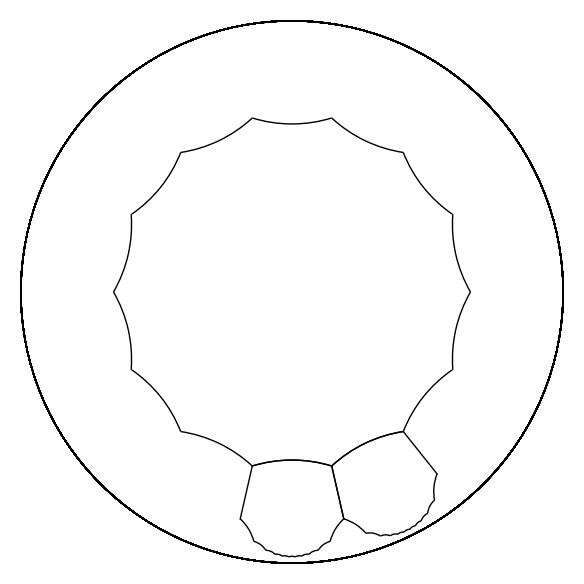

In [2]:
##### CELL2: SOME CODE DEFINING THE GENERATORS OF A TRIANGLE GROUP (2,3,M) and related things

#  FOR HYPERBOLIC GEOMETRY
PD=HyperbolicPlane().PD()
#  M DENOTES THE NUMBER OF EDGES OF THE HYPERBOLIC POLYGONS INVOLVED. WE WILL HERE TAKE M=14
M=14
lados, vertices, puntosmedios = poli2pi3(M) 
#####
H=N(arccosh(1/(tan((pi)/M)*tan((pi)/3))))
h=N(tanh(H/2))
R=N(arccosh((cos((pi)/3))/(sin((pi)/M))))
r=N(tanh(R/2))
LM=N(arccosh((cos((pi)/M))/(sin((pi)/3))))
L=2*LM
l=N(tanh(L/2))

B=PD.get_point(0+0*I)
C=PD.get_point(N(r*cos((pi)*3/2)+r*sin((pi)*3/2)*I))
A=PD.get_point(N(h*cos((pi)/M+3*(pi)/2)+h*sin((pi)/M+3*(pi)/2)*I))
lado_c, lado_b, lado_a =PD.get_geodesic(A,B),PD.get_geodesic(A,C), PD.get_geodesic(B,C)
a,b,c=lado_a.reflection_involution(), lado_b.reflection_involution(), lado_c.reflection_involution()

plotdom=moverpol(a*a^-1,'black')+moverpol(b,'black')+moverpol((c*a)^(1)*b,'black') 
#####

plotdom #The fundamental domain we choose. It is denoted F in the paper

In [3]:
##### CELL3: COMPUTING A SET OF ADMISSIBLE DISTANCES

#IF WANTED, REMOVE THE COMMENTS TO RUN THE PROGRAM. AS IT TAKES LONG (), WE PROVIDE THE OUTPUT BELOW (for our M=14 case)
##### PROGRAM Rota: certain element of the triangle group
#def Rota(t):
#    return (c*a)^t*a*b
#losta=[PD.dist(B,Rota(i)*B) for i in [1..M-1]]   
#losta=losta+[PD.dist(B,Rota(i)*Rota(j)*B) for i in [1..M-1] 
#losta=losta+[PD.dist(B,Rota(i)*Rota(j)*Rota(k)*B) for i in [1..M-1] for j in [1..M-1] for k in [1..M-1]]
#losta=losta+[PD.dist(B,Rota(i)*Rota(j)*Rota(k)*Rota(l)*B) for i in [1..M-1] for j in [1..M-1] for k in [1..M-1] for l in [1..M-1]]
#losta=losta+[PD.dist(B,Rota(i)*Rota(j)*Rota(k)*Rota(l)*Rota(m)*B) for i in [1..M-1] for j in [1..M-1] for k in [1..M-1] for l in [1..M-1] for m in [1..M-1]]
#
#### PROGRAM contrlista: getting rid of repetitions in the list of distances
#def constrlista(l):
#    l.sort()
#    f=[]
#    list=[l[0]]
#    for k in [1..len(l)-1]:        
#        if bool(abs(l[k]-list[-1])<10^-3)==false:
#                list.append(l[k] )        
#    return list
#
#distanciaaas=constrlista(losta)

distanciaaas=[2.89814944535521, 4.15197164687257, 4.86091342259702, 5.30790910905706, 5.58913346767491, 5.74583097416196,
 5.79629889071035, 6.36025260367871, 6.63611677724871, 6.71865650904608, 6.93501777272147, 6.97822941264967, 7.03754750959233,
 7.15222930419964, 7.35987537486489, 7.37012758905878, 7.47962329349661, 7.51596977530476, 7.61129088462438, 7.64322417032941,
 7.67230876205367, 7.73473059626207, 7.75438374003821, 7.78211793086637, 7.81202587851574, 7.95387750346304, 8.03783492351409,
 8.05238637892924, 8.09548892132969, 8.13352572088336, 8.17333502369826, 8.20415272571099, 8.25318558408830, 8.30394329374519,
 8.33103834995689, 8.37900130123672, 8.39304227954462, 8.42389086118815, 8.44795982497472, 8.48658579996257, 8.53671992940779,
 8.56135227081319, 8.58748400358995, 8.59590822746378, 8.59889769670856, 8.64382361317953, 8.67568714829746, 8.68681767114704,
 8.69444833606537, 8.75991086929948, 8.77716963200568, 8.84415491593729, 8.85067829192827, 8.90693348550993, 8.94014427253656,
 8.94607235398648, 8.97802856495031, 8.98006958545214, 8.99394140122488, 9.01097396772633]



In [4]:
##### CELL4: SOME OTHER FUNCTIONS


#A copy of the list of distances
dist2=[distanciaaas[k] for k in [0..len(distanciaaas)-1]]
dist2.sort()

##### FUNCTION elminimo: compares the list of distances with the translation length
def elminimo(s):
    u'''Requires an external set of distances dist2. Computes the index in the set of distances 
    of the first distance greater or equal than the translation length of an input transformation s.
    The output has a second coordinate that tells if that distance is the translation length.
    '''
    trl=(s*s).translation_length()/2
    dist2.append(trl)
    dist2.sort() 
    if bool(sage.misc.search.search(dist2,trl)[1]>0)==true and bool(abs(dist2[sage.misc.search.search(dist2,trl)[1]]-dist2[sage.misc.search.search(dist2,trl)[1]+1])<10^-4)==true:
        minimo=[sage.misc.search.search(dist2,trl)[1],'min-ehe']
        dist2.remove(trl)
    elif bool(sage.misc.search.search(dist2,trl)[1]>0)==true and bool(abs(dist2[sage.misc.search.search(dist2,trl)[1]]-dist2[sage.misc.search.search(dist2,trl)[1]-1])<10^-4)==true:
        minimo=[sage.misc.search.search(dist2,trl)[1]-1,'min-ehe']
        dist2.remove(trl) 
    elif bool(sage.misc.search.search(dist2,trl)[1]>0)==true and bool(dist2[sage.misc.search.search(dist2,trl)[1]-1]<trl<dist2[sage.misc.search.search(dist2,trl)[1]+1])==true and bool(trl-dist2[sage.misc.search.search(dist2,trl)[1]-1]>10^-4)==true and bool(dist2[sage.misc.search.search(dist2,trl)[1]+1]-trl>10^-4)==true:
        minimo=[sage.misc.search.search(dist2,trl)[1],'min-min']
        dist2.remove(trl) 
    elif bool(sage.misc.search.search(dist2,trl)[1]==0)==true and bool(abs(trl-sage.misc.search.search(dist2,trl)[1])<10^-4)==true:
        minimo=[0,'min-ehe']
        dist2.remove(trl) 
    elif bool(sage.misc.search.search(dist2,trl)[1]==0)==true and bool(abs(trl-sage.misc.search.search(dist2,trl)[1])>10^-4)==true:
        minimo=[0,'min-min']
        dist2.remove(trl) 
    return minimo
#####

##### FUNCTION elmaximo: some bound in the distances used. Requires external lists "vertices" and "dist2"
def elmaximo(s):
    movimientos=[]
    for k in [0..M-1]:
            movimientos.append(PD.dist(PD.get_point(vertices[k]),s*PD.get_point(vertices[k])))
    movimientos.sort()
    ult=movimientos[len(movimientos)-1]
    dist2.append(ult)
    dist2.sort()
    if bool(sage.misc.search.search(dist2,ult)[1]<len(distanciaaas))==true and bool(abs(ult-sage.misc.search.search(dist2,ult)[1]+1)<10^-4)==true:
        maximo=[sage.misc.search.search(dist2,ult)[1],'max-vert']
        dist2.remove(ult)
    elif bool(sage.misc.search.search(dist2,ult)[1]<len(distanciaaas))==true and bool(abs(ult-sage.misc.search.search(dist2,ult)[1]+1)>10^-4)==true:
        maximo=[sage.misc.search.search(dist2,ult)[1]-1,'max-corta']
        dist2.remove(ult)
    elif bool(sage.misc.search.search(dist2,ult)[1]==len(distanciaaas))==true or bool(sage.misc.search.search(dist2,ult)[1]>len(distanciaaas))==true:
        maximo=[len(distanciaaas)-1,'max-tope']
        dist2.remove(ult)
    return maximo
#####


##### FUNCTIONS G2 and G3 used to write certain specific elements of the triangle group
def G2(i):
    return a*b*(c*a)^i*a*b
def G3(i):
    return (c*a)^(1)*a*b*(c*a)^i*a*b*(c*a)^(-1)


In [ ]:
##### CELL5: COMPUTING THE (HUGE) LIST OF POSSIBLE SIDE-PAIRING TRANSFORMATIONS IN OUR CHOSEN DOMAIN

#IF WANTED, REMOVE THE COMMENTS TO RUN THE PROGRAM. AS IT TAKES LONG (), WE PROVIDE THE OUTPUT BELOW (for our M=14 case)

##### You can get the output in the next cells if you want the result directly without expending computing time

#pos2=0 # This has to do with the possition of the two polygons
#pos3=1 # we have chosen to form the fundamental domain along with the central one
##STEP 1
##CONFORMAL CASE
#con=[]
#for k in [0..M-1]:
#    for j in [0..M-1]:
#            con.append([((c*a)^j*a*b*(c*a)^(-k)).classification(),'de pol1 a pol1',k,j])
#            con.append([(G2(j)*(c*a)^(-k+pos2)).classification(),'de pol1 a pol2',k,j])
#            con.append([(G3(j)*(c*a)^(-k+pos3)).classification(),'de pol1 a pol3',k,j])
#            con.append([(G2(j)*(c*a)^(pos2)*a*b*(c*a)^(-pos2)*G2(-k)).classification(),'de pol2 a pol2',k,j])
#            con.append([(G3(j-1)*G2(-k-1)).classification(),'de pol2 a pol3',k,j])
#            con.append([(G3(j)*(c*a)^(pos3)*a*b*(c*a)^(-pos3)*G3(-k)).classification(),'de pol3 a pol3',k,j])
##ANTICONFORMAL CASE
#anticon=[]
#for k in [0..M-1]:
#    for j in [0..M-1]:
#            anticon.append([((c*a)^j*b*(c*a)^(-k)).classification(),'de pol1 a pol1',k,j])
#            anticon.append([(G2(j)*(c*a)^(pos2)*a*(c*a)^(-k)).classification(),'de pol1 a pol2',k,j])
#            anticon.append([(G3(j)*(c*a)^(pos3)*a*(c*a)^(-k)).classification(),'de pol1 a pol3',k,j])
#            anticon.append([(G2(j)*(c*a)^(pos2)*b*(c*a)^(-pos2)*G2(-k)).classification(),'de pol2 a pol2',k,j])
#            anticon.append([(G3(j-1)*G2(-1)*(c*a)^(pos2)*a*(c*a)^(-pos2)*G2(-k)).classification(),'de pol2 a pol3',k,j])
#            anticon.append([(G3(j)*(c*a)^(pos3)*b*(c*a)^(-pos3)*G3(-k)).classification(),'de pol3 a pol3',k,j])
#
##EACH ELEMENT OF THESE LITS CONTAINS THE TRANSFORMATION ITSELF, ITS TYPE AND INFO ABOUT WHICCH ARE THE SIDES PAIRED
#            
##STEP 2: GETTING RID OF THE UNWANTED TRANSFORMATIONS
#good=[]
#bad=[]
#for k in con+anticon:
#    if bool(k[0]=='hyperbolic') or bool(k[0]=='orientation-reversing hyperbolic'):
#        good.append(k)
#    else: 
#        bad.append(k)
#
#good1a1=[]
#good1a2=[]
#good1a3=[]
#good2a2=[]
#good2a3=[]
#good3a3=[]
#for k in good:
#    if bool(k[1]=='de pol1 a pol1') and bool(k[2]==0)==false and bool(k[2]==1)==false and bool(k[3]==0)==false and bool(k[3]==1)==false:
#        good1a1.append(k)
#    elif bool(k[1]=='de pol1 a pol2') and bool(k[2]==0)==false and bool(k[2]==1)==false and bool(k[3]==0)==false and bool(k[3]==13)==false:
#        good1a2.append(k)
#    elif bool(k[1]=='de pol1 a pol3') and bool(k[2]==0)==false and bool(k[2]==1)==false and bool(k[3]==0)==false and bool(k[3]==1)==false:
#        good1a3.append(k)
#    elif bool(k[1]=='de pol2 a pol2') and bool(k[2]==0)==false and bool(k[2]==13)==false and bool(k[3]==0)==false and bool(k[3]==13)==false:
#        good2a2.append(k) 
#    elif bool(k[1]=='de pol2 a pol3') and bool(k[2]==0)==false and bool(k[2]==13)==false and bool(k[3]==0)==false and bool(k[3]==1)==false:
#        good2a3.append(k) 
#    elif bool(k[1]=='de pol3 a pol3') and bool(k[2]==0)==false and bool(k[2]==1)==false and bool(k[3]==0)==false and bool(k[3]==1)==false:
#        good3a3.append(k)
#
#admissible=good1a1+good1a2+good1a3+good2a2+good2a3+good3a3 #stores info about the relevant transformations
#
#spw=[]
#for k in admissible:
#    if bool(k[0]=='hyperbolic') and bool(k[1]=='de pol1 a pol1'):
#        spw.append((c*a)^(k[3])*a*b*(c*a)^(-k[2]))
#    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol1 a pol2'):
#        spw.append(G2(k[3])*(c*a)^(-k[2]+pos2))
#    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol1 a pol3'):
#        spw.append(G3(k[3])*(c*a)^(-k[2]+pos3))
#    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol2 a pol2'):
#        spw.append(G2(k[3])*(c*a)^(pos2)*a*b*(c*a)^(-pos2)*G2(-k[2]))
#    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol2 a pol3'):
#        spw.append(G3(k[3]-1)*G2(-k[2]-1))
#    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol3 a pol3'):
#        spw.append(G3(k[3])*(c*a)^(pos3)*a*b*(c*a)^(-pos3)*G3(-k[2]))
#    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol1 a pol1'):
#        spw.append((c*a)^(k[3])*b*(c*a)^(-k[2]))
#    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol1 a pol2'):
#        spw.append(G2(k[3])*(c*a)^(pos2)*a*(c*a)^(-k[2]))
#    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol1 a pol3'):
#        spw.append(G3(k[3])*(c*a)^(pos3)*a*(c*a)^(-k[2]))
#    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol2 a pol2'):
#        spw.append(G2(k[3])*(c*a)^(pos2)*b*(c*a)^(-pos2)*G2(-k[2]))
#    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol2 a pol3'):
#        spw.append(G3(k[3]-1)*G2(-1)*(c*a)^(pos2)*a*(c*a)^(-pos2)*G2(-k[2]))
#    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol3 a pol3'):
#        spw.append(G3(k[3])*(c*a)^(pos3)*b*(c*a)^(-pos3)*G3(-k[2]))

##### spw stores the transformations themselves 

In [5]:
##### CELL6: The possible side-pairing transformations in our domain
##### The list admissible given here is computed in cell number 5 if you run that cell

admissible=[['hyperbolic', 'de pol1 a pol1', 2, 5],
 ['hyperbolic', 'de pol1 a pol1', 2, 6],
 ['hyperbolic', 'de pol1 a pol1', 2, 7],
 ['hyperbolic', 'de pol1 a pol1', 2, 8],
 ['hyperbolic', 'de pol1 a pol1', 2, 9],
 ['hyperbolic', 'de pol1 a pol1', 2, 10],
 ['hyperbolic', 'de pol1 a pol1', 2, 11],
 ['hyperbolic', 'de pol1 a pol1', 2, 12],
 ['hyperbolic', 'de pol1 a pol1', 2, 13],
 ['hyperbolic', 'de pol1 a pol1', 3, 6],
 ['hyperbolic', 'de pol1 a pol1', 3, 7],
 ['hyperbolic', 'de pol1 a pol1', 3, 8],
 ['hyperbolic', 'de pol1 a pol1', 3, 9],
 ['hyperbolic', 'de pol1 a pol1', 3, 10],
 ['hyperbolic', 'de pol1 a pol1', 3, 11],
 ['hyperbolic', 'de pol1 a pol1', 3, 12],
 ['hyperbolic', 'de pol1 a pol1', 3, 13],
 ['hyperbolic', 'de pol1 a pol1', 4, 7],
 ['hyperbolic', 'de pol1 a pol1', 4, 8],
 ['hyperbolic', 'de pol1 a pol1', 4, 9],
 ['hyperbolic', 'de pol1 a pol1', 4, 10],
 ['hyperbolic', 'de pol1 a pol1', 4, 11],
 ['hyperbolic', 'de pol1 a pol1', 4, 12],
 ['hyperbolic', 'de pol1 a pol1', 4, 13],
 ['hyperbolic', 'de pol1 a pol1', 5, 2],
 ['hyperbolic', 'de pol1 a pol1', 5, 8],
 ['hyperbolic', 'de pol1 a pol1', 5, 9],
 ['hyperbolic', 'de pol1 a pol1', 5, 10],
 ['hyperbolic', 'de pol1 a pol1', 5, 11],
 ['hyperbolic', 'de pol1 a pol1', 5, 12],
 ['hyperbolic', 'de pol1 a pol1', 5, 13],
 ['hyperbolic', 'de pol1 a pol1', 6, 2],
 ['hyperbolic', 'de pol1 a pol1', 6, 3],
 ['hyperbolic', 'de pol1 a pol1', 6, 9],
 ['hyperbolic', 'de pol1 a pol1', 6, 10],
 ['hyperbolic', 'de pol1 a pol1', 6, 11],
 ['hyperbolic', 'de pol1 a pol1', 6, 12],
 ['hyperbolic', 'de pol1 a pol1', 6, 13],
 ['hyperbolic', 'de pol1 a pol1', 7, 2],
 ['hyperbolic', 'de pol1 a pol1', 7, 3],
 ['hyperbolic', 'de pol1 a pol1', 7, 4],
 ['hyperbolic', 'de pol1 a pol1', 7, 10],
 ['hyperbolic', 'de pol1 a pol1', 7, 11],
 ['hyperbolic', 'de pol1 a pol1', 7, 12],
 ['hyperbolic', 'de pol1 a pol1', 7, 13],
 ['hyperbolic', 'de pol1 a pol1', 8, 2],
 ['hyperbolic', 'de pol1 a pol1', 8, 3],
 ['hyperbolic', 'de pol1 a pol1', 8, 4],
 ['hyperbolic', 'de pol1 a pol1', 8, 5],
 ['hyperbolic', 'de pol1 a pol1', 8, 11],
 ['hyperbolic', 'de pol1 a pol1', 8, 12],
 ['hyperbolic', 'de pol1 a pol1', 8, 13],
 ['hyperbolic', 'de pol1 a pol1', 9, 2],
 ['hyperbolic', 'de pol1 a pol1', 9, 3],
 ['hyperbolic', 'de pol1 a pol1', 9, 4],
 ['hyperbolic', 'de pol1 a pol1', 9, 5],
 ['hyperbolic', 'de pol1 a pol1', 9, 6],
 ['hyperbolic', 'de pol1 a pol1', 9, 12],
 ['hyperbolic', 'de pol1 a pol1', 9, 13],
 ['hyperbolic', 'de pol1 a pol1', 10, 2],
 ['hyperbolic', 'de pol1 a pol1', 10, 3],
 ['hyperbolic', 'de pol1 a pol1', 10, 4],
 ['hyperbolic', 'de pol1 a pol1', 10, 5],
 ['hyperbolic', 'de pol1 a pol1', 10, 6],
 ['hyperbolic', 'de pol1 a pol1', 10, 7],
 ['hyperbolic', 'de pol1 a pol1', 10, 13],
 ['hyperbolic', 'de pol1 a pol1', 11, 2],
 ['hyperbolic', 'de pol1 a pol1', 11, 3],
 ['hyperbolic', 'de pol1 a pol1', 11, 4],
 ['hyperbolic', 'de pol1 a pol1', 11, 5],
 ['hyperbolic', 'de pol1 a pol1', 11, 6],
 ['hyperbolic', 'de pol1 a pol1', 11, 7],
 ['hyperbolic', 'de pol1 a pol1', 11, 8],
 ['hyperbolic', 'de pol1 a pol1', 12, 2],
 ['hyperbolic', 'de pol1 a pol1', 12, 3],
 ['hyperbolic', 'de pol1 a pol1', 12, 4],
 ['hyperbolic', 'de pol1 a pol1', 12, 5],
 ['hyperbolic', 'de pol1 a pol1', 12, 6],
 ['hyperbolic', 'de pol1 a pol1', 12, 7],
 ['hyperbolic', 'de pol1 a pol1', 12, 8],
 ['hyperbolic', 'de pol1 a pol1', 12, 9],
 ['hyperbolic', 'de pol1 a pol1', 13, 2],
 ['hyperbolic', 'de pol1 a pol1', 13, 3],
 ['hyperbolic', 'de pol1 a pol1', 13, 4],
 ['hyperbolic', 'de pol1 a pol1', 13, 5],
 ['hyperbolic', 'de pol1 a pol1', 13, 6],
 ['hyperbolic', 'de pol1 a pol1', 13, 7],
 ['hyperbolic', 'de pol1 a pol1', 13, 8],
 ['hyperbolic', 'de pol1 a pol1', 13, 9],
 ['hyperbolic', 'de pol1 a pol1', 13, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 2, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 4, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 5, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 7, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 9, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 11, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 12, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 12],
 ['hyperbolic', 'de pol1 a pol2', 2, 1],
 ['hyperbolic', 'de pol1 a pol2', 2, 2],
 ['hyperbolic', 'de pol1 a pol2', 2, 3],
 ['hyperbolic', 'de pol1 a pol2', 2, 4],
 ['hyperbolic', 'de pol1 a pol2', 2, 5],
 ['hyperbolic', 'de pol1 a pol2', 2, 6],
 ['hyperbolic', 'de pol1 a pol2', 2, 7],
 ['hyperbolic', 'de pol1 a pol2', 2, 8],
 ['hyperbolic', 'de pol1 a pol2', 2, 9],
 ['hyperbolic', 'de pol1 a pol2', 2, 10],
 ['hyperbolic', 'de pol1 a pol2', 2, 11],
 ['hyperbolic', 'de pol1 a pol2', 3, 1],
 ['hyperbolic', 'de pol1 a pol2', 3, 2],
 ['hyperbolic', 'de pol1 a pol2', 3, 3],
 ['hyperbolic', 'de pol1 a pol2', 3, 4],
 ['hyperbolic', 'de pol1 a pol2', 3, 5],
 ['hyperbolic', 'de pol1 a pol2', 3, 6],
 ['hyperbolic', 'de pol1 a pol2', 3, 7],
 ['hyperbolic', 'de pol1 a pol2', 3, 8],
 ['hyperbolic', 'de pol1 a pol2', 3, 9],
 ['hyperbolic', 'de pol1 a pol2', 3, 10],
 ['hyperbolic', 'de pol1 a pol2', 3, 11],
 ['hyperbolic', 'de pol1 a pol2', 3, 12],
 ['hyperbolic', 'de pol1 a pol2', 4, 1],
 ['hyperbolic', 'de pol1 a pol2', 4, 2],
 ['hyperbolic', 'de pol1 a pol2', 4, 3],
 ['hyperbolic', 'de pol1 a pol2', 4, 4],
 ['hyperbolic', 'de pol1 a pol2', 4, 5],
 ['hyperbolic', 'de pol1 a pol2', 4, 6],
 ['hyperbolic', 'de pol1 a pol2', 4, 7],
 ['hyperbolic', 'de pol1 a pol2', 4, 8],
 ['hyperbolic', 'de pol1 a pol2', 4, 9],
 ['hyperbolic', 'de pol1 a pol2', 4, 10],
 ['hyperbolic', 'de pol1 a pol2', 4, 11],
 ['hyperbolic', 'de pol1 a pol2', 4, 12],
 ['hyperbolic', 'de pol1 a pol2', 5, 1],
 ['hyperbolic', 'de pol1 a pol2', 5, 2],
 ['hyperbolic', 'de pol1 a pol2', 5, 3],
 ['hyperbolic', 'de pol1 a pol2', 5, 4],
 ['hyperbolic', 'de pol1 a pol2', 5, 5],
 ['hyperbolic', 'de pol1 a pol2', 5, 6],
 ['hyperbolic', 'de pol1 a pol2', 5, 7],
 ['hyperbolic', 'de pol1 a pol2', 5, 8],
 ['hyperbolic', 'de pol1 a pol2', 5, 9],
 ['hyperbolic', 'de pol1 a pol2', 5, 10],
 ['hyperbolic', 'de pol1 a pol2', 5, 11],
 ['hyperbolic', 'de pol1 a pol2', 5, 12],
 ['hyperbolic', 'de pol1 a pol2', 6, 1],
 ['hyperbolic', 'de pol1 a pol2', 6, 2],
 ['hyperbolic', 'de pol1 a pol2', 6, 3],
 ['hyperbolic', 'de pol1 a pol2', 6, 4],
 ['hyperbolic', 'de pol1 a pol2', 6, 5],
 ['hyperbolic', 'de pol1 a pol2', 6, 6],
 ['hyperbolic', 'de pol1 a pol2', 6, 7],
 ['hyperbolic', 'de pol1 a pol2', 6, 8],
 ['hyperbolic', 'de pol1 a pol2', 6, 9],
 ['hyperbolic', 'de pol1 a pol2', 6, 10],
 ['hyperbolic', 'de pol1 a pol2', 6, 11],
 ['hyperbolic', 'de pol1 a pol2', 6, 12],
 ['hyperbolic', 'de pol1 a pol2', 7, 1],
 ['hyperbolic', 'de pol1 a pol2', 7, 2],
 ['hyperbolic', 'de pol1 a pol2', 7, 3],
 ['hyperbolic', 'de pol1 a pol2', 7, 4],
 ['hyperbolic', 'de pol1 a pol2', 7, 5],
 ['hyperbolic', 'de pol1 a pol2', 7, 6],
 ['hyperbolic', 'de pol1 a pol2', 7, 7],
 ['hyperbolic', 'de pol1 a pol2', 7, 8],
 ['hyperbolic', 'de pol1 a pol2', 7, 9],
 ['hyperbolic', 'de pol1 a pol2', 7, 10],
 ['hyperbolic', 'de pol1 a pol2', 7, 11],
 ['hyperbolic', 'de pol1 a pol2', 7, 12],
 ['hyperbolic', 'de pol1 a pol2', 8, 1],
 ['hyperbolic', 'de pol1 a pol2', 8, 2],
 ['hyperbolic', 'de pol1 a pol2', 8, 3],
 ['hyperbolic', 'de pol1 a pol2', 8, 4],
 ['hyperbolic', 'de pol1 a pol2', 8, 5],
 ['hyperbolic', 'de pol1 a pol2', 8, 6],
 ['hyperbolic', 'de pol1 a pol2', 8, 7],
 ['hyperbolic', 'de pol1 a pol2', 8, 8],
 ['hyperbolic', 'de pol1 a pol2', 8, 9],
 ['hyperbolic', 'de pol1 a pol2', 8, 10],
 ['hyperbolic', 'de pol1 a pol2', 8, 11],
 ['hyperbolic', 'de pol1 a pol2', 8, 12],
 ['hyperbolic', 'de pol1 a pol2', 9, 1],
 ['hyperbolic', 'de pol1 a pol2', 9, 2],
 ['hyperbolic', 'de pol1 a pol2', 9, 3],
 ['hyperbolic', 'de pol1 a pol2', 9, 4],
 ['hyperbolic', 'de pol1 a pol2', 9, 5],
 ['hyperbolic', 'de pol1 a pol2', 9, 6],
 ['hyperbolic', 'de pol1 a pol2', 9, 7],
 ['hyperbolic', 'de pol1 a pol2', 9, 8],
 ['hyperbolic', 'de pol1 a pol2', 9, 9],
 ['hyperbolic', 'de pol1 a pol2', 9, 10],
 ['hyperbolic', 'de pol1 a pol2', 9, 11],
 ['hyperbolic', 'de pol1 a pol2', 9, 12],
 ['hyperbolic', 'de pol1 a pol2', 10, 2],
 ['hyperbolic', 'de pol1 a pol2', 10, 3],
 ['hyperbolic', 'de pol1 a pol2', 10, 4],
 ['hyperbolic', 'de pol1 a pol2', 10, 5],
 ['hyperbolic', 'de pol1 a pol2', 10, 6],
 ['hyperbolic', 'de pol1 a pol2', 10, 7],
 ['hyperbolic', 'de pol1 a pol2', 10, 8],
 ['hyperbolic', 'de pol1 a pol2', 10, 9],
 ['hyperbolic', 'de pol1 a pol2', 10, 10],
 ['hyperbolic', 'de pol1 a pol2', 10, 11],
 ['hyperbolic', 'de pol1 a pol2', 10, 12],
 ['hyperbolic', 'de pol1 a pol2', 11, 2],
 ['hyperbolic', 'de pol1 a pol2', 11, 3],
 ['hyperbolic', 'de pol1 a pol2', 11, 4],
 ['hyperbolic', 'de pol1 a pol2', 11, 5],
 ['hyperbolic', 'de pol1 a pol2', 11, 6],
 ['hyperbolic', 'de pol1 a pol2', 11, 7],
 ['hyperbolic', 'de pol1 a pol2', 11, 8],
 ['hyperbolic', 'de pol1 a pol2', 11, 9],
 ['hyperbolic', 'de pol1 a pol2', 11, 10],
 ['hyperbolic', 'de pol1 a pol2', 11, 11],
 ['hyperbolic', 'de pol1 a pol2', 11, 12],
 ['hyperbolic', 'de pol1 a pol2', 12, 3],
 ['hyperbolic', 'de pol1 a pol2', 12, 4],
 ['hyperbolic', 'de pol1 a pol2', 12, 5],
 ['hyperbolic', 'de pol1 a pol2', 12, 6],
 ['hyperbolic', 'de pol1 a pol2', 12, 7],
 ['hyperbolic', 'de pol1 a pol2', 12, 8],
 ['hyperbolic', 'de pol1 a pol2', 12, 9],
 ['hyperbolic', 'de pol1 a pol2', 12, 10],
 ['hyperbolic', 'de pol1 a pol2', 12, 11],
 ['hyperbolic', 'de pol1 a pol2', 12, 12],
 ['hyperbolic', 'de pol1 a pol2', 13, 5],
 ['hyperbolic', 'de pol1 a pol2', 13, 6],
 ['hyperbolic', 'de pol1 a pol2', 13, 7],
 ['hyperbolic', 'de pol1 a pol2', 13, 8],
 ['hyperbolic', 'de pol1 a pol2', 13, 9],
 ['hyperbolic', 'de pol1 a pol2', 13, 10],
 ['hyperbolic', 'de pol1 a pol2', 13, 11],
 ['hyperbolic', 'de pol1 a pol2', 13, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 2, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 4, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 5, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 6, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 7, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 9, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 10, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 12, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 1],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol2', 13, 12],
 ['hyperbolic', 'de pol1 a pol3', 2, 2],
 ['hyperbolic', 'de pol1 a pol3', 2, 3],
 ['hyperbolic', 'de pol1 a pol3', 2, 4],
 ['hyperbolic', 'de pol1 a pol3', 2, 5],
 ['hyperbolic', 'de pol1 a pol3', 2, 6],
 ['hyperbolic', 'de pol1 a pol3', 2, 7],
 ['hyperbolic', 'de pol1 a pol3', 2, 8],
 ['hyperbolic', 'de pol1 a pol3', 2, 9],
 ['hyperbolic', 'de pol1 a pol3', 3, 2],
 ['hyperbolic', 'de pol1 a pol3', 3, 3],
 ['hyperbolic', 'de pol1 a pol3', 3, 4],
 ['hyperbolic', 'de pol1 a pol3', 3, 5],
 ['hyperbolic', 'de pol1 a pol3', 3, 6],
 ['hyperbolic', 'de pol1 a pol3', 3, 7],
 ['hyperbolic', 'de pol1 a pol3', 3, 8],
 ['hyperbolic', 'de pol1 a pol3', 3, 9],
 ['hyperbolic', 'de pol1 a pol3', 3, 10],
 ['hyperbolic', 'de pol1 a pol3', 3, 11],
 ['hyperbolic', 'de pol1 a pol3', 4, 2],
 ['hyperbolic', 'de pol1 a pol3', 4, 3],
 ['hyperbolic', 'de pol1 a pol3', 4, 4],
 ['hyperbolic', 'de pol1 a pol3', 4, 5],
 ['hyperbolic', 'de pol1 a pol3', 4, 6],
 ['hyperbolic', 'de pol1 a pol3', 4, 7],
 ['hyperbolic', 'de pol1 a pol3', 4, 8],
 ['hyperbolic', 'de pol1 a pol3', 4, 9],
 ['hyperbolic', 'de pol1 a pol3', 4, 10],
 ['hyperbolic', 'de pol1 a pol3', 4, 11],
 ['hyperbolic', 'de pol1 a pol3', 4, 12],
 ['hyperbolic', 'de pol1 a pol3', 5, 2],
 ['hyperbolic', 'de pol1 a pol3', 5, 3],
 ['hyperbolic', 'de pol1 a pol3', 5, 4],
 ['hyperbolic', 'de pol1 a pol3', 5, 5],
 ['hyperbolic', 'de pol1 a pol3', 5, 6],
 ['hyperbolic', 'de pol1 a pol3', 5, 7],
 ['hyperbolic', 'de pol1 a pol3', 5, 8],
 ['hyperbolic', 'de pol1 a pol3', 5, 9],
 ['hyperbolic', 'de pol1 a pol3', 5, 10],
 ['hyperbolic', 'de pol1 a pol3', 5, 11],
 ['hyperbolic', 'de pol1 a pol3', 5, 12],
 ['hyperbolic', 'de pol1 a pol3', 6, 2],
 ['hyperbolic', 'de pol1 a pol3', 6, 3],
 ['hyperbolic', 'de pol1 a pol3', 6, 4],
 ['hyperbolic', 'de pol1 a pol3', 6, 5],
 ['hyperbolic', 'de pol1 a pol3', 6, 6],
 ['hyperbolic', 'de pol1 a pol3', 6, 7],
 ['hyperbolic', 'de pol1 a pol3', 6, 8],
 ['hyperbolic', 'de pol1 a pol3', 6, 9],
 ['hyperbolic', 'de pol1 a pol3', 6, 10],
 ['hyperbolic', 'de pol1 a pol3', 6, 11],
 ['hyperbolic', 'de pol1 a pol3', 6, 12],
 ['hyperbolic', 'de pol1 a pol3', 6, 13],
 ['hyperbolic', 'de pol1 a pol3', 7, 2],
 ['hyperbolic', 'de pol1 a pol3', 7, 3],
 ['hyperbolic', 'de pol1 a pol3', 7, 4],
 ['hyperbolic', 'de pol1 a pol3', 7, 5],
 ['hyperbolic', 'de pol1 a pol3', 7, 6],
 ['hyperbolic', 'de pol1 a pol3', 7, 7],
 ['hyperbolic', 'de pol1 a pol3', 7, 8],
 ['hyperbolic', 'de pol1 a pol3', 7, 9],
 ['hyperbolic', 'de pol1 a pol3', 7, 10],
 ['hyperbolic', 'de pol1 a pol3', 7, 11],
 ['hyperbolic', 'de pol1 a pol3', 7, 12],
 ['hyperbolic', 'de pol1 a pol3', 7, 13],
 ['hyperbolic', 'de pol1 a pol3', 8, 2],
 ['hyperbolic', 'de pol1 a pol3', 8, 3],
 ['hyperbolic', 'de pol1 a pol3', 8, 4],
 ['hyperbolic', 'de pol1 a pol3', 8, 5],
 ['hyperbolic', 'de pol1 a pol3', 8, 6],
 ['hyperbolic', 'de pol1 a pol3', 8, 7],
 ['hyperbolic', 'de pol1 a pol3', 8, 8],
 ['hyperbolic', 'de pol1 a pol3', 8, 9],
 ['hyperbolic', 'de pol1 a pol3', 8, 10],
 ['hyperbolic', 'de pol1 a pol3', 8, 11],
 ['hyperbolic', 'de pol1 a pol3', 8, 12],
 ['hyperbolic', 'de pol1 a pol3', 8, 13],
 ['hyperbolic', 'de pol1 a pol3', 9, 2],
 ['hyperbolic', 'de pol1 a pol3', 9, 3],
 ['hyperbolic', 'de pol1 a pol3', 9, 4],
 ['hyperbolic', 'de pol1 a pol3', 9, 5],
 ['hyperbolic', 'de pol1 a pol3', 9, 6],
 ['hyperbolic', 'de pol1 a pol3', 9, 7],
 ['hyperbolic', 'de pol1 a pol3', 9, 8],
 ['hyperbolic', 'de pol1 a pol3', 9, 9],
 ['hyperbolic', 'de pol1 a pol3', 9, 10],
 ['hyperbolic', 'de pol1 a pol3', 9, 11],
 ['hyperbolic', 'de pol1 a pol3', 9, 12],
 ['hyperbolic', 'de pol1 a pol3', 9, 13],
 ['hyperbolic', 'de pol1 a pol3', 10, 2],
 ['hyperbolic', 'de pol1 a pol3', 10, 3],
 ['hyperbolic', 'de pol1 a pol3', 10, 4],
 ['hyperbolic', 'de pol1 a pol3', 10, 5],
 ['hyperbolic', 'de pol1 a pol3', 10, 6],
 ['hyperbolic', 'de pol1 a pol3', 10, 7],
 ['hyperbolic', 'de pol1 a pol3', 10, 8],
 ['hyperbolic', 'de pol1 a pol3', 10, 9],
 ['hyperbolic', 'de pol1 a pol3', 10, 10],
 ['hyperbolic', 'de pol1 a pol3', 10, 11],
 ['hyperbolic', 'de pol1 a pol3', 10, 12],
 ['hyperbolic', 'de pol1 a pol3', 10, 13],
 ['hyperbolic', 'de pol1 a pol3', 11, 2],
 ['hyperbolic', 'de pol1 a pol3', 11, 3],
 ['hyperbolic', 'de pol1 a pol3', 11, 4],
 ['hyperbolic', 'de pol1 a pol3', 11, 5],
 ['hyperbolic', 'de pol1 a pol3', 11, 6],
 ['hyperbolic', 'de pol1 a pol3', 11, 7],
 ['hyperbolic', 'de pol1 a pol3', 11, 8],
 ['hyperbolic', 'de pol1 a pol3', 11, 9],
 ['hyperbolic', 'de pol1 a pol3', 11, 10],
 ['hyperbolic', 'de pol1 a pol3', 11, 11],
 ['hyperbolic', 'de pol1 a pol3', 11, 12],
 ['hyperbolic', 'de pol1 a pol3', 11, 13],
 ['hyperbolic', 'de pol1 a pol3', 12, 2],
 ['hyperbolic', 'de pol1 a pol3', 12, 3],
 ['hyperbolic', 'de pol1 a pol3', 12, 4],
 ['hyperbolic', 'de pol1 a pol3', 12, 5],
 ['hyperbolic', 'de pol1 a pol3', 12, 6],
 ['hyperbolic', 'de pol1 a pol3', 12, 7],
 ['hyperbolic', 'de pol1 a pol3', 12, 8],
 ['hyperbolic', 'de pol1 a pol3', 12, 9],
 ['hyperbolic', 'de pol1 a pol3', 12, 10],
 ['hyperbolic', 'de pol1 a pol3', 12, 11],
 ['hyperbolic', 'de pol1 a pol3', 12, 12],
 ['hyperbolic', 'de pol1 a pol3', 12, 13],
 ['hyperbolic', 'de pol1 a pol3', 13, 3],
 ['hyperbolic', 'de pol1 a pol3', 13, 4],
 ['hyperbolic', 'de pol1 a pol3', 13, 5],
 ['hyperbolic', 'de pol1 a pol3', 13, 6],
 ['hyperbolic', 'de pol1 a pol3', 13, 7],
 ['hyperbolic', 'de pol1 a pol3', 13, 8],
 ['hyperbolic', 'de pol1 a pol3', 13, 9],
 ['hyperbolic', 'de pol1 a pol3', 13, 10],
 ['hyperbolic', 'de pol1 a pol3', 13, 11],
 ['hyperbolic', 'de pol1 a pol3', 13, 12],
 ['hyperbolic', 'de pol1 a pol3', 13, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 2, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 3, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 4, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 5, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 6, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 7, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 8, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 10, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 11, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 12, 13],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 2],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 3],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 4],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 5],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 6],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 7],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 8],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 9],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 10],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 11],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 12],
 ['orientation-reversing hyperbolic', 'de pol1 a pol3', 13, 13],
 ['hyperbolic', 'de pol2 a pol2', 1, 4],
 ['hyperbolic', 'de pol2 a pol2', 1, 5],
 ['hyperbolic', 'de pol2 a pol2', 1, 6],
 ['hyperbolic', 'de pol2 a pol2', 1, 7],
 ['hyperbolic', 'de pol2 a pol2', 1, 8],
 ['hyperbolic', 'de pol2 a pol2', 1, 9],
 ['hyperbolic', 'de pol2 a pol2', 1, 10],
 ['hyperbolic', 'de pol2 a pol2', 1, 11],
 ['hyperbolic', 'de pol2 a pol2', 1, 12],
 ['hyperbolic', 'de pol2 a pol2', 2, 5],
 ['hyperbolic', 'de pol2 a pol2', 2, 6],
 ['hyperbolic', 'de pol2 a pol2', 2, 7],
 ['hyperbolic', 'de pol2 a pol2', 2, 8],
 ['hyperbolic', 'de pol2 a pol2', 2, 9],
 ['hyperbolic', 'de pol2 a pol2', 2, 10],
 ['hyperbolic', 'de pol2 a pol2', 2, 11],
 ['hyperbolic', 'de pol2 a pol2', 2, 12],
 ['hyperbolic', 'de pol2 a pol2', 3, 6],
 ['hyperbolic', 'de pol2 a pol2', 3, 7],
 ['hyperbolic', 'de pol2 a pol2', 3, 8],
 ['hyperbolic', 'de pol2 a pol2', 3, 9],
 ['hyperbolic', 'de pol2 a pol2', 3, 10],
 ['hyperbolic', 'de pol2 a pol2', 3, 11],
 ['hyperbolic', 'de pol2 a pol2', 3, 12],
 ['hyperbolic', 'de pol2 a pol2', 4, 1],
 ['hyperbolic', 'de pol2 a pol2', 4, 7],
 ['hyperbolic', 'de pol2 a pol2', 4, 8],
 ['hyperbolic', 'de pol2 a pol2', 4, 9],
 ['hyperbolic', 'de pol2 a pol2', 4, 10],
 ['hyperbolic', 'de pol2 a pol2', 4, 11],
 ['hyperbolic', 'de pol2 a pol2', 4, 12],
 ['hyperbolic', 'de pol2 a pol2', 5, 1],
 ['hyperbolic', 'de pol2 a pol2', 5, 2],
 ['hyperbolic', 'de pol2 a pol2', 5, 8],
 ['hyperbolic', 'de pol2 a pol2', 5, 9],
 ['hyperbolic', 'de pol2 a pol2', 5, 10],
 ['hyperbolic', 'de pol2 a pol2', 5, 11],
 ['hyperbolic', 'de pol2 a pol2', 5, 12],
 ['hyperbolic', 'de pol2 a pol2', 6, 1],
 ['hyperbolic', 'de pol2 a pol2', 6, 2],
 ['hyperbolic', 'de pol2 a pol2', 6, 3],
 ['hyperbolic', 'de pol2 a pol2', 6, 9],
 ['hyperbolic', 'de pol2 a pol2', 6, 10],
 ['hyperbolic', 'de pol2 a pol2', 6, 11],
 ['hyperbolic', 'de pol2 a pol2', 6, 12],
 ['hyperbolic', 'de pol2 a pol2', 7, 1],
 ['hyperbolic', 'de pol2 a pol2', 7, 2],
 ['hyperbolic', 'de pol2 a pol2', 7, 3],
 ['hyperbolic', 'de pol2 a pol2', 7, 4],
 ['hyperbolic', 'de pol2 a pol2', 7, 10],
 ['hyperbolic', 'de pol2 a pol2', 7, 11],
 ['hyperbolic', 'de pol2 a pol2', 7, 12],
 ['hyperbolic', 'de pol2 a pol2', 8, 1],
 ['hyperbolic', 'de pol2 a pol2', 8, 2],
 ['hyperbolic', 'de pol2 a pol2', 8, 3],
 ['hyperbolic', 'de pol2 a pol2', 8, 4],
 ['hyperbolic', 'de pol2 a pol2', 8, 5],
 ['hyperbolic', 'de pol2 a pol2', 8, 11],
 ['hyperbolic', 'de pol2 a pol2', 8, 12],
 ['hyperbolic', 'de pol2 a pol2', 9, 1],
 ['hyperbolic', 'de pol2 a pol2', 9, 2],
 ['hyperbolic', 'de pol2 a pol2', 9, 3],
 ['hyperbolic', 'de pol2 a pol2', 9, 4],
 ['hyperbolic', 'de pol2 a pol2', 9, 5],
 ['hyperbolic', 'de pol2 a pol2', 9, 6],
 ['hyperbolic', 'de pol2 a pol2', 9, 12],
 ['hyperbolic', 'de pol2 a pol2', 10, 1],
 ['hyperbolic', 'de pol2 a pol2', 10, 2],
 ['hyperbolic', 'de pol2 a pol2', 10, 3],
 ['hyperbolic', 'de pol2 a pol2', 10, 4],
 ['hyperbolic', 'de pol2 a pol2', 10, 5],
 ['hyperbolic', 'de pol2 a pol2', 10, 6],
 ['hyperbolic', 'de pol2 a pol2', 10, 7],
 ['hyperbolic', 'de pol2 a pol2', 11, 1],
 ['hyperbolic', 'de pol2 a pol2', 11, 2],
 ['hyperbolic', 'de pol2 a pol2', 11, 3],
 ['hyperbolic', 'de pol2 a pol2', 11, 4],
 ['hyperbolic', 'de pol2 a pol2', 11, 5],
 ['hyperbolic', 'de pol2 a pol2', 11, 6],
 ['hyperbolic', 'de pol2 a pol2', 11, 7],
 ['hyperbolic', 'de pol2 a pol2', 11, 8],
 ['hyperbolic', 'de pol2 a pol2', 12, 1],
 ['hyperbolic', 'de pol2 a pol2', 12, 2],
 ['hyperbolic', 'de pol2 a pol2', 12, 3],
 ['hyperbolic', 'de pol2 a pol2', 12, 4],
 ['hyperbolic', 'de pol2 a pol2', 12, 5],
 ['hyperbolic', 'de pol2 a pol2', 12, 6],
 ['hyperbolic', 'de pol2 a pol2', 12, 7],
 ['hyperbolic', 'de pol2 a pol2', 12, 8],
 ['hyperbolic', 'de pol2 a pol2', 12, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 1, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 2, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 3, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 4, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 5, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 6, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 7, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 8, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 9, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 10, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 11, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 1],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol2', 12, 11],
 ['hyperbolic', 'de pol2 a pol3', 1, 2],
 ['hyperbolic', 'de pol2 a pol3', 1, 3],
 ['hyperbolic', 'de pol2 a pol3', 1, 4],
 ['hyperbolic', 'de pol2 a pol3', 1, 5],
 ['hyperbolic', 'de pol2 a pol3', 1, 6],
 ['hyperbolic', 'de pol2 a pol3', 1, 7],
 ['hyperbolic', 'de pol2 a pol3', 1, 8],
 ['hyperbolic', 'de pol2 a pol3', 1, 9],
 ['hyperbolic', 'de pol2 a pol3', 1, 10],
 ['hyperbolic', 'de pol2 a pol3', 1, 11],
 ['hyperbolic', 'de pol2 a pol3', 1, 12],
 ['hyperbolic', 'de pol2 a pol3', 2, 2],
 ['hyperbolic', 'de pol2 a pol3', 2, 3],
 ['hyperbolic', 'de pol2 a pol3', 2, 4],
 ['hyperbolic', 'de pol2 a pol3', 2, 5],
 ['hyperbolic', 'de pol2 a pol3', 2, 6],
 ['hyperbolic', 'de pol2 a pol3', 2, 7],
 ['hyperbolic', 'de pol2 a pol3', 2, 8],
 ['hyperbolic', 'de pol2 a pol3', 2, 9],
 ['hyperbolic', 'de pol2 a pol3', 2, 10],
 ['hyperbolic', 'de pol2 a pol3', 2, 11],
 ['hyperbolic', 'de pol2 a pol3', 2, 12],
 ['hyperbolic', 'de pol2 a pol3', 2, 13],
 ['hyperbolic', 'de pol2 a pol3', 3, 2],
 ['hyperbolic', 'de pol2 a pol3', 3, 3],
 ['hyperbolic', 'de pol2 a pol3', 3, 4],
 ['hyperbolic', 'de pol2 a pol3', 3, 5],
 ['hyperbolic', 'de pol2 a pol3', 3, 6],
 ['hyperbolic', 'de pol2 a pol3', 3, 7],
 ['hyperbolic', 'de pol2 a pol3', 3, 8],
 ['hyperbolic', 'de pol2 a pol3', 3, 9],
 ['hyperbolic', 'de pol2 a pol3', 3, 10],
 ['hyperbolic', 'de pol2 a pol3', 3, 11],
 ['hyperbolic', 'de pol2 a pol3', 3, 12],
 ['hyperbolic', 'de pol2 a pol3', 3, 13],
 ['hyperbolic', 'de pol2 a pol3', 4, 2],
 ['hyperbolic', 'de pol2 a pol3', 4, 3],
 ['hyperbolic', 'de pol2 a pol3', 4, 4],
 ['hyperbolic', 'de pol2 a pol3', 4, 5],
 ['hyperbolic', 'de pol2 a pol3', 4, 6],
 ['hyperbolic', 'de pol2 a pol3', 4, 7],
 ['hyperbolic', 'de pol2 a pol3', 4, 8],
 ['hyperbolic', 'de pol2 a pol3', 4, 9],
 ['hyperbolic', 'de pol2 a pol3', 4, 10],
 ['hyperbolic', 'de pol2 a pol3', 4, 11],
 ['hyperbolic', 'de pol2 a pol3', 4, 12],
 ['hyperbolic', 'de pol2 a pol3', 4, 13],
 ['hyperbolic', 'de pol2 a pol3', 5, 2],
 ['hyperbolic', 'de pol2 a pol3', 5, 3],
 ['hyperbolic', 'de pol2 a pol3', 5, 4],
 ['hyperbolic', 'de pol2 a pol3', 5, 5],
 ['hyperbolic', 'de pol2 a pol3', 5, 6],
 ['hyperbolic', 'de pol2 a pol3', 5, 7],
 ['hyperbolic', 'de pol2 a pol3', 5, 8],
 ['hyperbolic', 'de pol2 a pol3', 5, 9],
 ['hyperbolic', 'de pol2 a pol3', 5, 10],
 ['hyperbolic', 'de pol2 a pol3', 5, 11],
 ['hyperbolic', 'de pol2 a pol3', 5, 12],
 ['hyperbolic', 'de pol2 a pol3', 5, 13],
 ['hyperbolic', 'de pol2 a pol3', 6, 2],
 ['hyperbolic', 'de pol2 a pol3', 6, 3],
 ['hyperbolic', 'de pol2 a pol3', 6, 4],
 ['hyperbolic', 'de pol2 a pol3', 6, 5],
 ['hyperbolic', 'de pol2 a pol3', 6, 6],
 ['hyperbolic', 'de pol2 a pol3', 6, 7],
 ['hyperbolic', 'de pol2 a pol3', 6, 8],
 ['hyperbolic', 'de pol2 a pol3', 6, 9],
 ['hyperbolic', 'de pol2 a pol3', 6, 10],
 ['hyperbolic', 'de pol2 a pol3', 6, 11],
 ['hyperbolic', 'de pol2 a pol3', 6, 12],
 ['hyperbolic', 'de pol2 a pol3', 6, 13],
 ['hyperbolic', 'de pol2 a pol3', 7, 2],
 ['hyperbolic', 'de pol2 a pol3', 7, 3],
 ['hyperbolic', 'de pol2 a pol3', 7, 4],
 ['hyperbolic', 'de pol2 a pol3', 7, 5],
 ['hyperbolic', 'de pol2 a pol3', 7, 6],
 ['hyperbolic', 'de pol2 a pol3', 7, 7],
 ['hyperbolic', 'de pol2 a pol3', 7, 8],
 ['hyperbolic', 'de pol2 a pol3', 7, 9],
 ['hyperbolic', 'de pol2 a pol3', 7, 10],
 ['hyperbolic', 'de pol2 a pol3', 7, 11],
 ['hyperbolic', 'de pol2 a pol3', 7, 12],
 ['hyperbolic', 'de pol2 a pol3', 7, 13],
 ['hyperbolic', 'de pol2 a pol3', 8, 2],
 ['hyperbolic', 'de pol2 a pol3', 8, 3],
 ['hyperbolic', 'de pol2 a pol3', 8, 4],
 ['hyperbolic', 'de pol2 a pol3', 8, 5],
 ['hyperbolic', 'de pol2 a pol3', 8, 6],
 ['hyperbolic', 'de pol2 a pol3', 8, 7],
 ['hyperbolic', 'de pol2 a pol3', 8, 8],
 ['hyperbolic', 'de pol2 a pol3', 8, 9],
 ['hyperbolic', 'de pol2 a pol3', 8, 10],
 ['hyperbolic', 'de pol2 a pol3', 8, 11],
 ['hyperbolic', 'de pol2 a pol3', 8, 12],
 ['hyperbolic', 'de pol2 a pol3', 8, 13],
 ['hyperbolic', 'de pol2 a pol3', 9, 3],
 ['hyperbolic', 'de pol2 a pol3', 9, 4],
 ['hyperbolic', 'de pol2 a pol3', 9, 5],
 ['hyperbolic', 'de pol2 a pol3', 9, 6],
 ['hyperbolic', 'de pol2 a pol3', 9, 7],
 ['hyperbolic', 'de pol2 a pol3', 9, 8],
 ['hyperbolic', 'de pol2 a pol3', 9, 9],
 ['hyperbolic', 'de pol2 a pol3', 9, 10],
 ['hyperbolic', 'de pol2 a pol3', 9, 11],
 ['hyperbolic', 'de pol2 a pol3', 9, 12],
 ['hyperbolic', 'de pol2 a pol3', 9, 13],
 ['hyperbolic', 'de pol2 a pol3', 10, 3],
 ['hyperbolic', 'de pol2 a pol3', 10, 4],
 ['hyperbolic', 'de pol2 a pol3', 10, 5],
 ['hyperbolic', 'de pol2 a pol3', 10, 6],
 ['hyperbolic', 'de pol2 a pol3', 10, 7],
 ['hyperbolic', 'de pol2 a pol3', 10, 8],
 ['hyperbolic', 'de pol2 a pol3', 10, 9],
 ['hyperbolic', 'de pol2 a pol3', 10, 10],
 ['hyperbolic', 'de pol2 a pol3', 10, 11],
 ['hyperbolic', 'de pol2 a pol3', 10, 12],
 ['hyperbolic', 'de pol2 a pol3', 10, 13],
 ['hyperbolic', 'de pol2 a pol3', 11, 4],
 ['hyperbolic', 'de pol2 a pol3', 11, 5],
 ['hyperbolic', 'de pol2 a pol3', 11, 6],
 ['hyperbolic', 'de pol2 a pol3', 11, 7],
 ['hyperbolic', 'de pol2 a pol3', 11, 8],
 ['hyperbolic', 'de pol2 a pol3', 11, 9],
 ['hyperbolic', 'de pol2 a pol3', 11, 10],
 ['hyperbolic', 'de pol2 a pol3', 11, 11],
 ['hyperbolic', 'de pol2 a pol3', 11, 12],
 ['hyperbolic', 'de pol2 a pol3', 11, 13],
 ['hyperbolic', 'de pol2 a pol3', 12, 6],
 ['hyperbolic', 'de pol2 a pol3', 12, 7],
 ['hyperbolic', 'de pol2 a pol3', 12, 8],
 ['hyperbolic', 'de pol2 a pol3', 12, 9],
 ['hyperbolic', 'de pol2 a pol3', 12, 10],
 ['hyperbolic', 'de pol2 a pol3', 12, 11],
 ['hyperbolic', 'de pol2 a pol3', 12, 12],
 ['hyperbolic', 'de pol2 a pol3', 12, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 1, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 3, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 4, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 5, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 6, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 7, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 8, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 9, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 10, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 11, 13],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 2],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 3],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 4],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 5],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 6],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 7],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 8],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 9],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 10],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 11],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 12],
 ['orientation-reversing hyperbolic', 'de pol2 a pol3', 12, 13],
 ['hyperbolic', 'de pol3 a pol3', 2, 5],
 ['hyperbolic', 'de pol3 a pol3', 2, 6],
 ['hyperbolic', 'de pol3 a pol3', 2, 7],
 ['hyperbolic', 'de pol3 a pol3', 2, 8],
 ['hyperbolic', 'de pol3 a pol3', 2, 9],
 ['hyperbolic', 'de pol3 a pol3', 2, 10],
 ['hyperbolic', 'de pol3 a pol3', 2, 11],
 ['hyperbolic', 'de pol3 a pol3', 2, 12],
 ['hyperbolic', 'de pol3 a pol3', 2, 13],
 ['hyperbolic', 'de pol3 a pol3', 3, 6],
 ['hyperbolic', 'de pol3 a pol3', 3, 7],
 ['hyperbolic', 'de pol3 a pol3', 3, 8],
 ['hyperbolic', 'de pol3 a pol3', 3, 9],
 ['hyperbolic', 'de pol3 a pol3', 3, 10],
 ['hyperbolic', 'de pol3 a pol3', 3, 11],
 ['hyperbolic', 'de pol3 a pol3', 3, 12],
 ['hyperbolic', 'de pol3 a pol3', 3, 13],
 ['hyperbolic', 'de pol3 a pol3', 4, 7],
 ['hyperbolic', 'de pol3 a pol3', 4, 8],
 ['hyperbolic', 'de pol3 a pol3', 4, 9],
 ['hyperbolic', 'de pol3 a pol3', 4, 10],
 ['hyperbolic', 'de pol3 a pol3', 4, 11],
 ['hyperbolic', 'de pol3 a pol3', 4, 12],
 ['hyperbolic', 'de pol3 a pol3', 4, 13],
 ['hyperbolic', 'de pol3 a pol3', 5, 2],
 ['hyperbolic', 'de pol3 a pol3', 5, 8],
 ['hyperbolic', 'de pol3 a pol3', 5, 9],
 ['hyperbolic', 'de pol3 a pol3', 5, 10],
 ['hyperbolic', 'de pol3 a pol3', 5, 11],
 ['hyperbolic', 'de pol3 a pol3', 5, 12],
 ['hyperbolic', 'de pol3 a pol3', 5, 13],
 ['hyperbolic', 'de pol3 a pol3', 6, 2],
 ['hyperbolic', 'de pol3 a pol3', 6, 3],
 ['hyperbolic', 'de pol3 a pol3', 6, 9],
 ['hyperbolic', 'de pol3 a pol3', 6, 10],
 ['hyperbolic', 'de pol3 a pol3', 6, 11],
 ['hyperbolic', 'de pol3 a pol3', 6, 12],
 ['hyperbolic', 'de pol3 a pol3', 6, 13],
 ['hyperbolic', 'de pol3 a pol3', 7, 2],
 ['hyperbolic', 'de pol3 a pol3', 7, 3],
 ['hyperbolic', 'de pol3 a pol3', 7, 4],
 ['hyperbolic', 'de pol3 a pol3', 7, 10],
 ['hyperbolic', 'de pol3 a pol3', 7, 11],
 ['hyperbolic', 'de pol3 a pol3', 7, 12],
 ['hyperbolic', 'de pol3 a pol3', 7, 13],
 ['hyperbolic', 'de pol3 a pol3', 8, 2],
 ['hyperbolic', 'de pol3 a pol3', 8, 3],
 ['hyperbolic', 'de pol3 a pol3', 8, 4],
 ['hyperbolic', 'de pol3 a pol3', 8, 5],
 ['hyperbolic', 'de pol3 a pol3', 8, 11],
 ['hyperbolic', 'de pol3 a pol3', 8, 12],
 ['hyperbolic', 'de pol3 a pol3', 8, 13],
 ['hyperbolic', 'de pol3 a pol3', 9, 2],
 ['hyperbolic', 'de pol3 a pol3', 9, 3],
 ['hyperbolic', 'de pol3 a pol3', 9, 4],
 ['hyperbolic', 'de pol3 a pol3', 9, 5],
 ['hyperbolic', 'de pol3 a pol3', 9, 6],
 ['hyperbolic', 'de pol3 a pol3', 9, 12],
 ['hyperbolic', 'de pol3 a pol3', 9, 13],
 ['hyperbolic', 'de pol3 a pol3', 10, 2],
 ['hyperbolic', 'de pol3 a pol3', 10, 3],
 ['hyperbolic', 'de pol3 a pol3', 10, 4],
 ['hyperbolic', 'de pol3 a pol3', 10, 5],
 ['hyperbolic', 'de pol3 a pol3', 10, 6],
 ['hyperbolic', 'de pol3 a pol3', 10, 7],
 ['hyperbolic', 'de pol3 a pol3', 10, 13],
 ['hyperbolic', 'de pol3 a pol3', 11, 2],
 ['hyperbolic', 'de pol3 a pol3', 11, 3],
 ['hyperbolic', 'de pol3 a pol3', 11, 4],
 ['hyperbolic', 'de pol3 a pol3', 11, 5],
 ['hyperbolic', 'de pol3 a pol3', 11, 6],
 ['hyperbolic', 'de pol3 a pol3', 11, 7],
 ['hyperbolic', 'de pol3 a pol3', 11, 8],
 ['hyperbolic', 'de pol3 a pol3', 12, 2],
 ['hyperbolic', 'de pol3 a pol3', 12, 3],
 ['hyperbolic', 'de pol3 a pol3', 12, 4],
 ['hyperbolic', 'de pol3 a pol3', 12, 5],
 ['hyperbolic', 'de pol3 a pol3', 12, 6],
 ['hyperbolic', 'de pol3 a pol3', 12, 7],
 ['hyperbolic', 'de pol3 a pol3', 12, 8],
 ['hyperbolic', 'de pol3 a pol3', 12, 9],
 ['hyperbolic', 'de pol3 a pol3', 13, 2],
 ['hyperbolic', 'de pol3 a pol3', 13, 3],
 ['hyperbolic', 'de pol3 a pol3', 13, 4],
 ['hyperbolic', 'de pol3 a pol3', 13, 5],
 ['hyperbolic', 'de pol3 a pol3', 13, 6],
 ['hyperbolic', 'de pol3 a pol3', 13, 7],
 ['hyperbolic', 'de pol3 a pol3', 13, 8],
 ['hyperbolic', 'de pol3 a pol3', 13, 9],
 ['hyperbolic', 'de pol3 a pol3', 13, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 2, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 3, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 4, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 5, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 6, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 7, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 8, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 9, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 10, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 12],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 11, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 12, 13],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 2],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 3],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 4],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 5],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 6],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 7],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 8],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 9],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 10],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 11],
 ['orientation-reversing hyperbolic', 'de pol3 a pol3', 13, 12]];
### This is the list of side-pairing transformations denoted by (caligraphic) P in the paper

In [8]:
##### CELL7: The possible side-pairing transformations in our domain, now given as isometries of the disc
##### The list spw given here is computed in cell number 5 if you run that cell

pos2=0 # This has to do with the possition of the two polygons
pos3=1 # we have chosen to form the fundamental domain along with the central one
spw=[]
for k in admissible:
    if bool(k[0]=='hyperbolic') and bool(k[1]=='de pol1 a pol1'):
        spw.append((c*a)^(k[3])*a*b*(c*a)^(-k[2]))
    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol1 a pol2'):
        spw.append(G2(k[3])*(c*a)^(-k[2]+pos2))
    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol1 a pol3'):
        spw.append(G3(k[3])*(c*a)^(-k[2]+pos3))
    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol2 a pol2'):
        spw.append(G2(k[3])*(c*a)^(pos2)*a*b*(c*a)^(-pos2)*G2(-k[2]))
    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol2 a pol3'):
        spw.append(G3(k[3]-1)*G2(-k[2]-1))
    elif bool(k[0]=='hyperbolic') and bool(k[1]=='de pol3 a pol3'):
        spw.append(G3(k[3])*(c*a)^(pos3)*a*b*(c*a)^(-pos3)*G3(-k[2]))
    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol1 a pol1'):
        spw.append((c*a)^(k[3])*b*(c*a)^(-k[2]))
    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol1 a pol2'):
        spw.append(G2(k[3])*(c*a)^(pos2)*a*(c*a)^(-k[2]))
    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol1 a pol3'):
        spw.append(G3(k[3])*(c*a)^(pos3)*a*(c*a)^(-k[2]))
    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol2 a pol2'):
        spw.append(G2(k[3])*(c*a)^(pos2)*b*(c*a)^(-pos2)*G2(-k[2]))
    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol2 a pol3'):
        spw.append(G3(k[3]-1)*G2(-1)*(c*a)^(pos2)*a*(c*a)^(-pos2)*G2(-k[2]))
    elif bool(k[0]=='orientation-reversing hyperbolic') and bool(k[1]=='de pol3 a pol3'):
        spw.append(G3(k[3])*(c*a)^(pos3)*b*(c*a)^(-pos3)*G3(-k[2]))



In [9]:
##### CELL8: WE CHOOSE TWO OF THE SIDE-PAIRINGS ARBITRARILY. IF THE CONSTRUCTION WOULD NOT WORK WE WOULD CHANGE THEM
### These two transformations are denoted p_0 and p_1 in the paper


sidepairings=['empty']
sidepairings.append([(c*a)^-4*b*(c*a),-1])
sidepairings.append([G2(7)*(c*a)^-2,1])

##### CHECKING THE MINIMAL DISTANCES INVOLVED FOR THESE TWO
elminimo(sidepairings[1][0]),elminimo(sidepairings[2][0])

([0, 'min-min'], [1, 'min-min'])

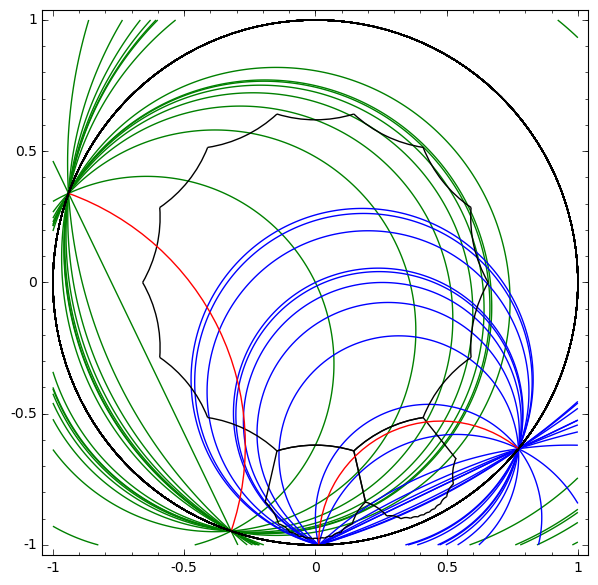

In [10]:
##### CELL9: PLOT OF OUR FUNDAMENTAL DOMAIN TOGETHER WITH SOME BANANAS FOR THE CHOSEN PAIR

final=plotdom

final=final+bananasprogramadas(1,0,7,'green')         
final=final+bananasprogramadas(2,1,9,'blue')    

final


In [12]:
##### CELL8: WE EXTRACT SOME INTERSECTION POINTS OF BANANAS OF OUR PAIR, AFTER VISUAL INSPECTION OF THE PREVIOUS PLOT


[coordenadascorte(1,0,'ar',2,2,'ar'),
 coordenadascorte(1,0,'ar',2,3,'ar'),
 coordenadascorte(1,0,'ar',2,4,'ar'),
 coordenadascorte(1,0,'ar',2,5,'ar'),
 coordenadascorte(1,0,'ar',2,6,'ar'),
 coordenadascorte(1,0,'ar',2,7,'ar'),
 coordenadascorte(1,0,'ar',2,8,'ar'),
 coordenadascorte(1,0,'ar',2,9,'ar'),
 
coordenadascorte(1,1,'ar',2,1,'ar'),
 coordenadascorte(1,1,'ar',2,2,'ar'),
 coordenadascorte(1,1,'ar',2,3,'ar'),
 coordenadascorte(1,1,'ar',2,4,'ar'),
 coordenadascorte(1,1,'ar',2,5,'ar'),
 coordenadascorte(1,1,'ar',2,6,'ar'),
 coordenadascorte(1,1,'ar',2,7,'ar'),
 coordenadascorte(1,1,'ar',2,8,'ar'),
 coordenadascorte(1,1,'ar',2,9,'ar'),
 
 coordenadascorte(1,2,'ar',2,2,'ar'),
 coordenadascorte(1,2,'ar',2,3,'ar'),
 coordenadascorte(1,2,'ar',2,4,'ar'),
 coordenadascorte(1,2,'ar',2,5,'ar'),
 coordenadascorte(1,2,'ar',2,6,'ar'),
 coordenadascorte(1,2,'ar',2,7,'ar'),
 coordenadascorte(1,2,'ar',2,8,'ar'),
 coordenadascorte(1,2,'ar',2,9,'ar'),
 
 coordenadascorte(1,3,'ar',2,2,'ar'),
 coordenadascorte(1,3,'ar',2,3,'ar'),
 coordenadascorte(1,3,'ar',2,4,'ar'),
 coordenadascorte(1,3,'ar',2,5,'ar'),
 coordenadascorte(1,3,'ar',2,6,'ar'),
 coordenadascorte(1,3,'ar',2,7,'ar'),
 coordenadascorte(1,3,'ar',2,8,'ar'),
 coordenadascorte(1,3,'ar',2,9,'ar')]


[[-0.118693951049347 - 0.794276493639542*I,
  0.0699376919874736 - 0.276382537059429*I],
 [-0.153382672224167 - 0.829340588927805*I,
  0.0481687361403458 - 0.131797568964316*I],
 [-0.170137348101097 - 0.844649828453238*I,
  0.0231042257718536 - 0.0534473949842738*I],
 [-0.178478172624560 - 0.851916926381780*I,
  0.00596926235788610 - 0.0127136235881928*I],
 [-0.181042657900204 - 0.854106087324631*I,
  5.94801985442928e-14 - 9.27036225562006e-14*I],
 [-0.206554962624898 - 0.874789655715922*I,
  -0.0800972161567172 + 0.129083513455870*I],
 [-0.217359042747933 - 0.882981826447372*I,
  -0.126912932527730 + 0.183318561973308*I],
 [-0.220414630775850 - 0.885240763163019*I,
  -0.141694871344748 + 0.198349343959700*I],
 [0.00292883200227106 - 0.845334395611942*I,
  0.324127569582101 - 0.477772475566186*I],
 [-0.0786858745458547 - 0.886610700790126*I,
  0.382282985561761 - 0.207827980032820*I],
 [-0.105191439359972 - 0.897497323699642*I,
  0.376316478037629 - 0.0860523954867632*I],
 [-0.1198349

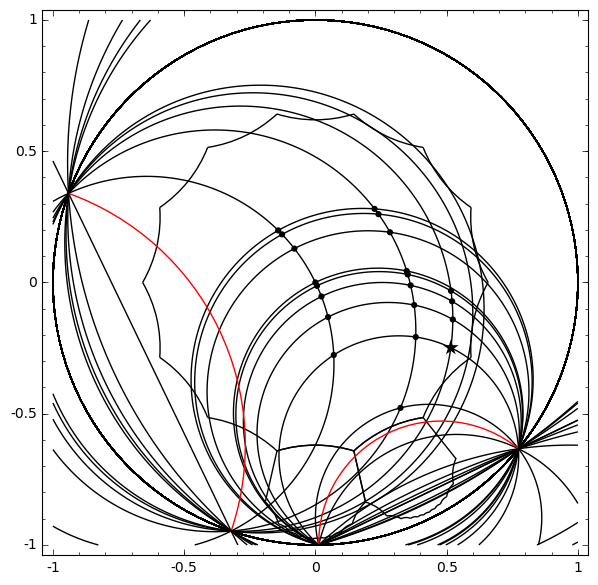

In [13]:
##### CELL9: A LIST OF CANDIDATES, EXTRACTED FROM THE PREVIOUS LIST (AFTER CHECKING WHICH IS THE CORRECT POINT IN EVERY PAIR)
### The list we extract here is part of the set of candidates denoted by (caligraphic) C in the paper



candidates=[
  0.0699376919874736 - 0.276382537059429*I,
  0.0481687361403458 - 0.131797568964316*I,
  0.0231042257718536 - 0.0534473949842738*I,
  0.00596926235788610 - 0.0127136235881928*I,
  5.94801985442928e-14 - 9.27036225562006e-14*I,
  -0.0800972161567172 + 0.129083513455870*I,
  -0.126912932527730 + 0.183318561973308*I,
  -0.141694871344748 + 0.198349343959700*I,
  0.324127569582101 - 0.477772475566186*I,
  0.382282985561761 - 0.207827980032820*I,
  0.376316478037629 - 0.0860523954867632*I,
  0.362799968715589 - 0.0111207082463889*I,
  0.351898995131988 + 0.0304712645552365*I,
  0.347856932019349 + 0.0438430405642420*I,
  0.284172415433174 + 0.191259669606289*I,
  0.240212707124891 + 0.260382667228505*I,
  0.225424707873735 + 0.280400710682884*I,
  0.515984860898361 - 0.248485212697688*I,
  0.523564089137107 - 0.141018535722289*I,
  0.520859582563600 - 0.0716927435242377*I,
  0.516621497295892 - 0.0320341718987482*I]

#CHECKING HOW THESE CANDIDATES LOOK LIKE IN THE PLOT OF OUR DOMAIN (CHECKING THAT WE DID NO MISTAKE)
test=plotdom
for k in [0..16]+[18..20]:
    test=test+(PD.get_point(candidates[k])).show(color='black',size='20')
test=test+bananasprogramadas(1,0,4,'black')+bananasprogramadas(2,1,9,'black')+(PD.get_point(candidates[17])).show(color='black',size='140',marker='*')
test



In [14]:
##### CELL10: CHECKING WHICH TRANSFORMATIONS MOVE CORRECTLY EACH ONE OF OUR CANDIDATES 

dist2=[distanciaaas[k] for k in [0..len(distanciaaas)-1]]
dist2.sort()

busquedapuntos=[]
for m in [0..len(candidates)-1]:
    puntoindividual=[]
    for k in [0..len(spw)-1]:
        distancia=PD.dist(PD.get_point(candidates[m]),spw[k]*PD.get_point(candidates[m]))
        dist2.append(distancia)
        dist2.sort()
        if bool(distancia>dist2[len(dist2)-1])==false and bool(abs(distancia-dist2[len(dist2)-1])<10^-4)==false:
            if abs(dist2[sage.misc.search.search(dist2,distancia)[1]]-dist2[sage.misc.search.search(dist2,distancia)[1]+1])<10^-4:
                puntoindividual.append([[m,candidates[m]],[admissible[k][0],admissible[k][1],admissible[k][2],admissible[k][3]],distancia,dist2[sage.misc.search.search(dist2,distancia)[1]],sage.misc.search.search(dist2,distancia)[1]])
        
        if bool(distancia>dist2[len(dist2)-1])==false and bool(abs(distancia-dist2[len(dist2)-1])<10^-4)==false:
            if abs(dist2[sage.misc.search.search(dist2,distancia)[1]]-dist2[sage.misc.search.search(dist2,distancia)[1]-1])<10^-4:
                puntoindividual.append([[m,candidates[m]],[admissible[k][0],admissible[k][1],admissible[k][2],admissible[k][3]],distancia,dist2[sage.misc.search.search(dist2,distancia)[1]-1],sage.misc.search.search(dist2,distancia)[1]-1])
                
        elif bool(distancia>dist2[len(dist2)-1]):
           puntoindividual.append([[m,candidates[m]],[admissible[k][0],admissible[k][1],admissible[k][2],admissible[k][3]],distancia,'se pasa'])
        dist2.remove(distancia)
    busquedapuntos.append(puntoindividual)
busquedapuntos

[[[[0, 0.0699376919874736 - 0.276382537059429*I],
   ['orientation-reversing hyperbolic', 'de pol1 a pol1', 10, 13],
   2.89814944535523,
   2.89814944535521,
   0],
  [[0, 0.0699376919874736 - 0.276382537059429*I],
   ['orientation-reversing hyperbolic', 'de pol1 a pol1', 13, 10],
   2.89814944535522,
   2.89814944535521,
   0],
  [[0, 0.0699376919874736 - 0.276382537059429*I],
   ['hyperbolic', 'de pol1 a pol2', 2, 7],
   4.86091342259661,
   4.86091342259661,
   2],
  [[0, 0.0699376919874736 - 0.276382537059429*I],
   ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 1],
   2.89814944535521,
   2.89814944535521,
   0],
  [[0, 0.0699376919874736 - 0.276382537059429*I],
   ['orientation-reversing hyperbolic', 'de pol1 a pol3', 9, 7],
   5.74584970032898,
   5.74583097416196,
   5],
  [[0, 0.0699376919874736 - 0.276382537059429*I],
   ['hyperbolic', 'de pol2 a pol3', 8, 13],
   4.86091342259668,
   4.86091342259668,
   2]],
 [[[1, 0.0481687361403458 - 0.131797568964316*I],
   

In [15]:
##### CELL11: TRYING TO DETERMINE IF SOME OF THE CANDIDATE POINTS IS MOVED AN ADMISSIBLE AMOUNT FOR 
# AT LEAST ONE SIDE-PAIRING STARTING AT EACH OF THE EDGES OF THE DOMAIN.
# THIS CONDITION IS NECESSARY BUT NOT SUFFICIENT FOR FINDING THE SURFACE WE WANT TO FIND


def sacarep(l):
    lost=[]
    for k in l:
        if bool(k in lost)==false:
            lost.append(k)
    return lost

puzle=[]
for k in [0..len(busquedapuntos)-1]:
    edges=[]
    for j in [0..len(busquedapuntos[k])-1]:
        if bool(busquedapuntos[k][j][1][1]=='de pol1 a pol1'):
            edges.append([busquedapuntos[k][j][1][2],1])
            edges.append([busquedapuntos[k][j][1][3],1])
        elif bool(busquedapuntos[k][j][1][1]=='de pol1 a pol2'):
            edges.append([busquedapuntos[k][j][1][2],1])
            edges.append([busquedapuntos[k][j][1][3],2])
        elif bool(busquedapuntos[k][j][1][1]=='de pol1 a pol3'):
            edges.append([busquedapuntos[k][j][1][2],1])
            edges.append([busquedapuntos[k][j][1][3],3])
        elif bool(busquedapuntos[k][j][1][1]=='de pol2 a pol2'):
            edges.append([busquedapuntos[k][j][1][2],2])
            edges.append([busquedapuntos[k][j][1][3],2])
        elif bool(busquedapuntos[k][j][1][1]=='de pol2 a pol3'):
            edges.append([busquedapuntos[k][j][1][2],2])
            edges.append([busquedapuntos[k][j][1][3],3])
        elif bool(busquedapuntos[k][j][1][1]=='de pol3 a pol3'):
            edges.append([busquedapuntos[k][j][1][2],3])
            edges.append([busquedapuntos[k][j][1][3],3])
        loquecubre1=[]
        loquecubre2=[]
        loquecubre3=[]
        for m in edges:
            if bool(m[1]==1):
                loquecubre1.append(m[0])
            elif bool(m[1]==2):
                loquecubre2.append(m[0])
            elif bool(m[1]==3):
                loquecubre3.append(m[0])
        loquecubre1.sort()
        loquecubre2.sort()
        loquecubre3.sort()
        cubierto=[sacarep(loquecubre1),sacarep(loquecubre2),sacarep(loquecubre3)]
    puzle.append(cubierto)

locorrecto=[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]

forpuzle=[]
for k in [0..len(puzle)-1]:
    if bool(puzle[k]==locorrecto):
        forpuzle.append(k)
        
forpuzle


[4, 17]

In [ ]:
#We find that the points at places 4 and 17 in the list busquedapuntos suffer a correct displacement under 
#at least one side-pairing starting at every edge of the domain
#The point at position 4 is the origin. The point at position 17 is 0.515984860898361 - 0.248485212697688*I

In [16]:
##### CELL 12: DETERMINING THE SIDE-PAIRINGS 
# FROM A GIVEN EDGE "arista" SOMEWHERE ELSE THAT MOVE AN ADMISSIBLE DISTANCE 
# THE POINT 0.515984860898361 - 0.248485212697688*I

arista=3

posibilidades=[]
for k in [0..len(busquedapuntos[17])-1]:
    if bool(busquedapuntos[17][k][1][2]==arista) or bool(busquedapuntos[17][k][1][3]==arista):
        posibilidades.append(busquedapuntos[17][k])
posibilidades


[[[17, 0.515984860898361 - 0.248485212697688*I],
  ['hyperbolic', 'de pol1 a pol1', 3, 11],
  2.89814944535530,
  2.89814944535521,
  0],
 [[17, 0.515984860898361 - 0.248485212697688*I],
  ['hyperbolic', 'de pol1 a pol1', 11, 3],
  2.89814944535530,
  2.89814944535521,
  0],
 [[17, 0.515984860898361 - 0.248485212697688*I],
  ['orientation-reversing hyperbolic', 'de pol1 a pol1', 3, 8],
  2.89814944535541,
  2.89814944535521,
  0],
 [[17, 0.515984860898361 - 0.248485212697688*I],
  ['orientation-reversing hyperbolic', 'de pol1 a pol1', 8, 3],
  2.89814944535542,
  2.89814944535521,
  0],
 [[17, 0.515984860898361 - 0.248485212697688*I],
  ['hyperbolic', 'de pol1 a pol2', 3, 10],
  4.15197164687249,
  4.15197164687249,
  1],
 [[17, 0.515984860898361 - 0.248485212697688*I],
  ['hyperbolic', 'de pol1 a pol2', 5, 3],
  5.58913346767501,
  5.58913346767491,
  4],
 [[17, 0.515984860898361 - 0.248485212697688*I],
  ['orientation-reversing hyperbolic', 'de pol1 a pol2', 3, 7],
  4.86091342259699

In [17]:
##### CELL 13: AFTER RUNNING THE PREVIOUS CELL  FOR THE DIFERENT EDGES, WITH QUITE SOME WORK DONE BY HAND,
# WE END BUILDING UP A FULL SET OF SIDE-PAIRINGS WHICH GENERATE A SURFACE GROUP UNIFORMIZING OUR SURFACE
# THE POINT 0.515984860898361 - 0.248485212697688*I IS A GOOD CANDIDATE FOR BEING THE CENTER OF ONE OF THE 
# DISCS OF A SECOND (HIDDEN) 3-PACKING

# The whole list of side-pairings:

resultado=[[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol1 a pol2', 3, 10],
   4.15197164687249,
   4.15197164687249,
   1],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol1 a pol3', 4, 5],
   4.86091342259705,
   4.86091342259702,
   2],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol1 a pol2', 5, 3],
   5.58913346767501,
   5.58913346767491,
   4],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['orientation-reversing hyperbolic', 'de pol1 a pol1', 6, 9],
   4.86091342259734,
   4.86091342259702,
   2],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol1 a pol1', 7, 12],
   4.86091342259719,
   4.86091342259702,
   2],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['orientation-reversing hyperbolic', 'de pol1 a pol2', 8, 2],
   5.74583097416199,
   5.74583097416196,
   5],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['orientation-reversing hyperbolic', 'de pol1 a pol2', 11, 1],
   4.86091342259701,
   4.86091342259701,
   2],
 [[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol2 a pol3', 4, 4],
   7.78211793086644,
   7.78211793086637,
   23],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol2 a pol3', 5, 10],
   7.64322417032919,
   7.64322417032919,
   19],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol2 a pol2', 6, 11],
   7.95387750346274,
   7.95387750346274,
   25],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol2 a pol3', 8, 13],
   4.86091342259669,
   4.86091342259669,
   2],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol2 a pol3', 9, 6],
   8.17333502369759,
   8.17333502369759,
   30],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol2 a pol3', 12, 9],
   6.36025260367824,
   6.36025260367824,
   7],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['orientation-reversing hyperbolic', 'de pol2 a pol3', 2, 8],
   7.03754750959188,
   7.03754750959188,
   12],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol3 a pol3', 3, 11],
   5.74583097416152,
   5.74583097416152,
   5],
[[17, 0.515984860898361 - 0.248485212697688*I],
   ['hyperbolic', 'de pol3 a pol3', 7, 12],
   5.79629889070986,
   5.79629889070986,
   6]]



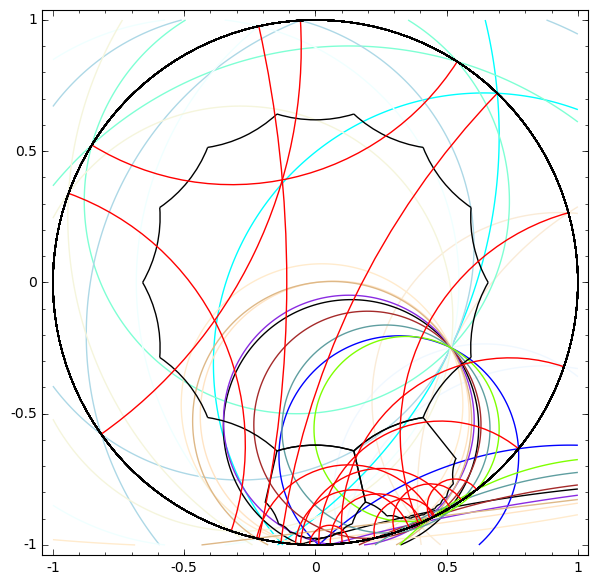

In [18]:
##### CELL 14: A picture showing how all the bananas meet at one point

sidepairings=[[spw[admissible.index(resultado[j][1])],0] for j in [0..len(resultado)-1]]
for k in [0..len(resultado)-1]:
    if resultado[k][1][0]=='hyperbolic':
        sidepairings[k][1]=1
    else:
        sidepairings[k][1]=-1
sidepairings=['empty']+sidepairings
sidepairings
picture=plotdom

picture=picture+bananasprogramadas(1,1,1,sorted(colors)[0])         
picture=picture+bananasprogramadas(2,2,2,sorted(colors)[1])         
picture=picture+bananasprogramadas(3,4,4,sorted(colors)[2])         
picture=picture+bananasprogramadas(4,2,2,sorted(colors)[3])         
picture=picture+bananasprogramadas(5,2,2,sorted(colors)[4])         
picture=picture+bananasprogramadas(6,5,5,sorted(colors)[5])         
picture=picture+bananasprogramadas(7,2,2,sorted(colors)[6])         
picture=picture+bananasprogramadas(8,23,23,sorted(colors)[7])         
picture=picture+bananasprogramadas(9,19,19,sorted(colors)[8])         
picture=picture+bananasprogramadas(10,25,25,sorted(colors)[9])         
picture=picture+bananasprogramadas(11,2,2,sorted(colors)[10])         
picture=picture+bananasprogramadas(12,30,30,sorted(colors)[11])         
picture=picture+bananasprogramadas(13,7,7,sorted(colors)[12])         
picture=picture+bananasprogramadas(14,12,12,sorted(colors)[13])         
picture=picture+bananasprogramadas(15,5,5,sorted(colors)[14])         
picture=picture+bananasprogramadas(16,6,6,sorted(colors)[15])         

picture

In [19]:
sidepairings

['empty', [Isometry in PD
  [ 3.94740252841725 + 5.94988620742473*I -5.52745085692600 - 4.40799496675370*I]
  [-5.52745085692600 + 4.40799496675370*I  3.94740252841725 - 5.94988620742473*I],
  1], [Isometry in PD
  [-5.44988620742469 - 6.13804566218465*I  3.53493750307761 + 7.34037336068657*I]
  [ 3.53493750307761 - 7.34037336068657*I -5.44988620742469 + 6.13804566218465*I],
  1], [Isometry in PD
  [-5.44988620742468 - 1.75675939464986*I  2.44625265300018 + 5.07969597537667*I]
  [ 2.44625265300018 - 5.07969597537667*I -5.44988620742468 + 1.75675939464986*I],
  1], [Isometry in PD
  [ 0.499999999999982 - 2.19064313376740*I   1.57319518932405 + 1.25458129900375*I]
  [ -1.57319518932405 + 1.25458129900375*I -0.499999999999982 - 2.19064313376740*I],
  -1], [Isometry in PD
  [ 2.02445866976114 - 0.974927912181823*I -0.873057463676129 - 1.81292250376062*I]
  [-0.873057463676129 + 1.81292250376062*I  2.02445866976114 + 0.974927912181823*I],
  1], [Isometry in PD
  [ 4.04891733952228 - 1.99285

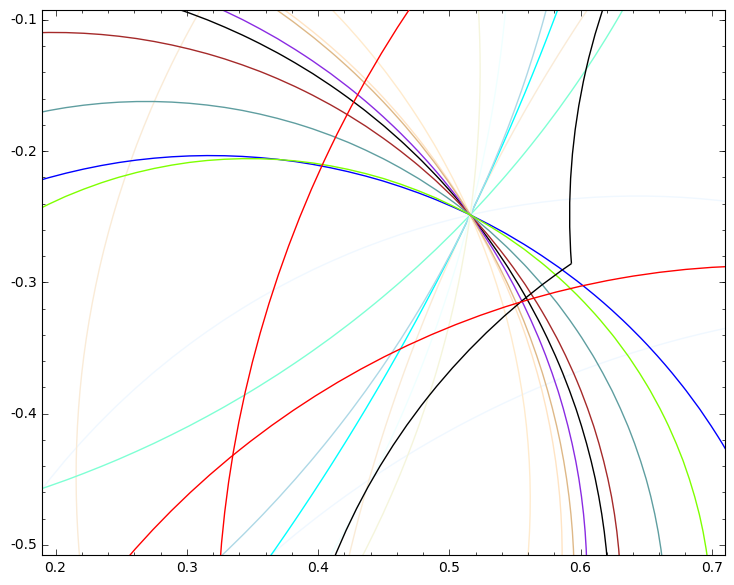

In [20]:
##### CELL 15: Zooming in near the special point
picture.show(xmin=0.2, xmax=0.7, ymin=-0.5, ymax=-0.1)